<a href="https://colab.research.google.com/github/01DaisyLynn/Time-Series-Project/blob/main/Team_Miyagi_Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Overview**

### Defining the Question

Build predictive models tracking the future stock price of Google.

### Objectives

**Main objective**

To build a model that would predict the future prices of the stock

**Specific objectives**

To find change in stock price overtime

To determine which month has the highest price in stock



### Metric of success

Model will be considered a success when it achieves a low RMSE and an accuracy of more than 80%

### Context

Stock market prediction is the act of trying to determine the future value of a company stock or financial instrument traded on an exchange. Buying and selling of stock determines the price of a company’s stock. Where a company’s fundamentals are healthy, steady and visionary leadership in place and returns promised to shareholders are realized, demand for the company’s shares will go up as will its share price.

The opening and closing prices of a company’s stock play a crucial role in the decision making of an investor alongside other technical and fundamental factors. Essentially, the interplay of these and other factors make the forecasting of a company’s stock an arduous and complex task. 
In this research, we seek to build predictive models tracking the future price of Google stock.



### Data Description

* Date: The date of that trading day.
* Open: The price of the stock at the very beginning of that trading day but opening price does not need to be equal to the previous day’s closing price.
* High: The highest price the stock had during that trading day.
* Low: The lowest price the stock had during that trading day.
* Close: The price of the stock at closing time of that trading day.
* Adj Close: The adjusted closing price is the closing price of the stock that has been changed to include any distributions and corporate actions that occurred during that trading day.
* Volume: The number of stocks that were traded during that trading day.

### Experimental Design

1.  Installing and Importing libraries
2.  Reviewing the data 
3.  Checking data for errors/anomalies
4.  Tidying dataset
5.  Performing Exploratory Data Analysis
6.  Perfoming predictions
7.  Conclusions and Reccomendations

# **2. Installation of the Relevant Libraries**

In [ ]:
#Installing the yahoo finance libraries to import the Stock data
!pip install yfinance
!pip install yahoofinancials

!pip install mplfinance

ERROR: Operation cancelled by user


# **3. Importing the Libraries**

In [ ]:
#Importing Pandas library
import pandas as pd

#Importing Lag Plot from Pandas

from pandas.plotting import lag_plot
#Importing Numpy Library
import numpy as np

#Importing Matplotlib Library

import matplotlib.pyplot as plt

#Leveraging Matplotlib for Financial visualization

import mplfinance as mpl

#Importing Seaborn Library

import seaborn as sns

sns.set_theme()

#sns.set_palette('bright')

import math


#Importing the Yahoo Finance API
import yfinance as yf

from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings("ignore")


import statsmodels.api as sm

from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Importing the Dick Fueller test
from statsmodels.tsa.stattools import adfuller

#Importing the KPSS test

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.preprocessing import MinMaxScaler


#Importing Keras for Neural Network Analysis
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping



import fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

## **4. Loading Dataset**

In [ ]:
#Downloading Google Stock Data from Yahoo Finance 

data = yf.download(['GOOGL'],           
start='2018-01-01',
end='2022-04-17',
progress=False, actions='inline')
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2018-01-02,1053.020020,1075.979980,1053.020020,1073.209961,1073.209961,1588300,0,0
2018-01-03,1073.930054,1096.099976,1073.430054,1091.520020,1091.520020,1565900,0,0
2018-01-04,1097.089966,1104.079956,1094.260010,1095.760010,1095.760010,1302600,0,0
2018-01-05,1103.449951,1113.579956,1101.800049,1110.290039,1110.290039,1512500,0,0
2018-01-08,1111.000000,1119.160034,1110.000000,1114.209961,1114.209961,1232200,0,0


In [ ]:
#Checking the last rows
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-04-08,2711.669922,2713.399902,2659.310059,2665.750000,2665.750000,1256000,0,0
2022-04-11,2636.469971,2641.850098,2573.370117,2576.469971,2576.469971,1844200,0,0
2022-04-12,2632.000000,2632.000000,2535.780029,2554.290039,2554.290039,1635500,0,0
2022-04-13,2560.000000,2606.679932,2554.820068,2597.879883,2597.879883,1396400,0,0
2022-04-14,2609.590088,2609.590088,2532.020020,2534.600098,2534.600098,1576500,0,0


In [ ]:
#We will require a benchmark stock price providing a generalised view of the market price
#We will use the S&P 500 which represents 500 most influential companies in the US
#Downloading S&P 500 2015-2021 Data from Yahoo Finance
sp500 = yf.download('^GSPC',
start='2018-01-01',
end='2022-04-17',
progress=False, actions='inline')

#Previewing the Data
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3367250000,0,0
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3538660000,0,0
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3695260000,0,0
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3236620000,0,0
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3242650000,0,0


## **5. Reviewing Dataset**

In [ ]:
#getting the shape of our dataset
data.shape

(1080, 8)

There are 1080 records and 8 columns

In [ ]:
#Checking for sum of duplicates
data.duplicated().sum()

0

No presence of duplicates

In [ ]:
#Checking for missing values
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

No presence of missing values

In [ ]:
#checking the data types 
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

In [ ]:
#statistical description of our numerical variables
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1.080000e+03,1080.0,1080.0
mean,1645.548018,1662.383552,1628.099336,1645.718352,1645.718352,1.777999e+06,0.0,0.0
std,633.921012,638.717320,627.235034,632.857919,632.857919,8.259722e+05,0.0,0.0
min,984.320007,1012.119995,977.659973,984.669983,984.669983,4.656000e+05,0.0,0.0
25%,1151.827515,1162.262512,1139.315033,1153.325043,1153.325043,1.257050e+06,0.0,0.0
50%,1348.280029,1359.790039,1337.419983,1347.599976,1347.599976,1.572000e+06,0.0,0.0
75%,2083.369934,2111.872498,2064.727600,2088.815063,2088.815063,2.018700e+06,0.0,0.0
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,6.658900e+06,0.0,0.0


In [ ]:
#checking for unique values
data['Stock Splits'].unique()

array([0])

The stock split variable only has the value 0 in all its rows

In [ ]:
#checking for unique values
data['Dividends'].unique()

array([0])

The dividends variable only has the value 0 in all its rows

In [ ]:
#Dropping column
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1053.020020,1075.979980,1053.020020,1073.209961,1073.209961,1588300
2018-01-03,1073.930054,1096.099976,1073.430054,1091.520020,1091.520020,1565900


The Dividends and Stock split variables were dropped since they have no values other than 0 for all their rows

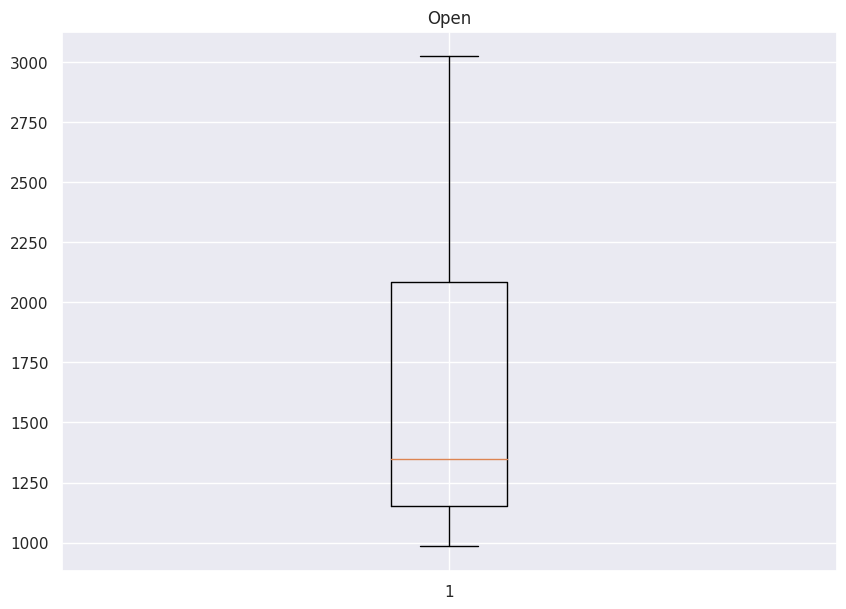

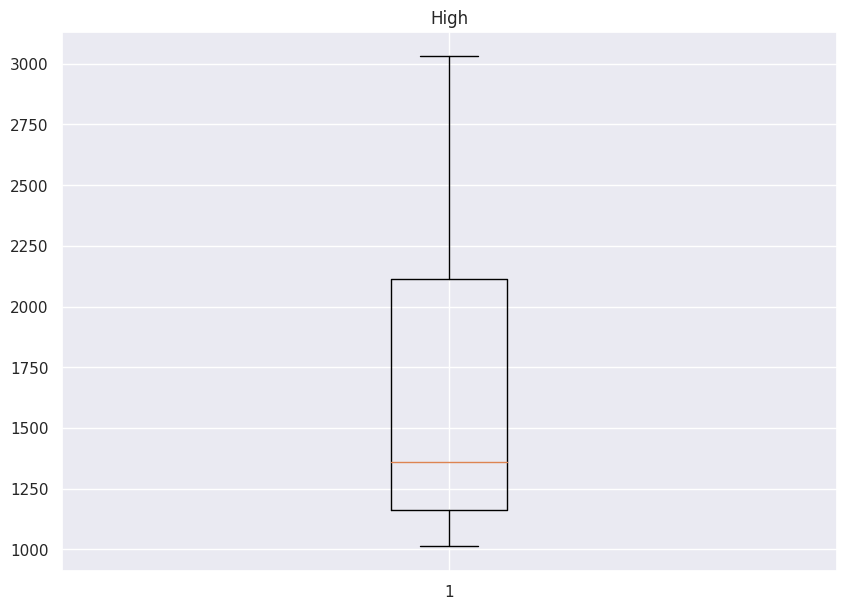

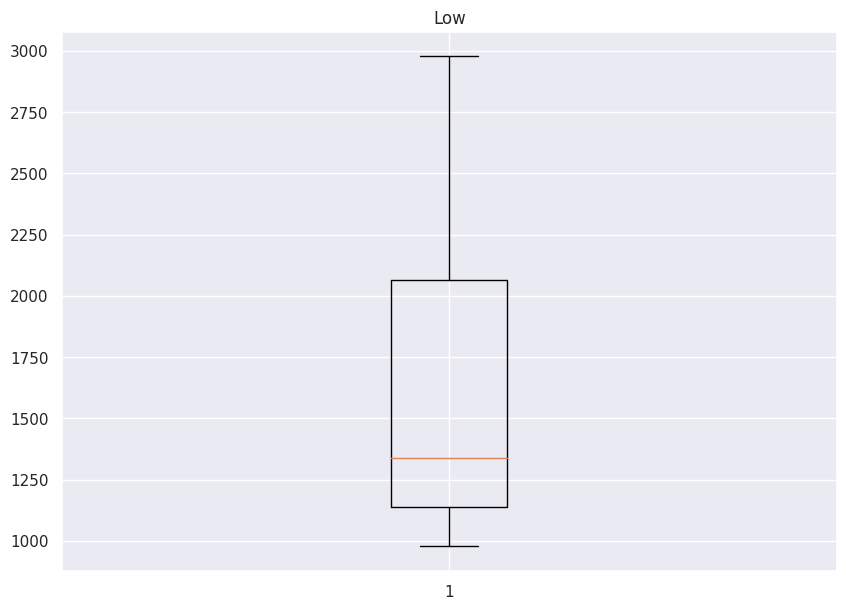

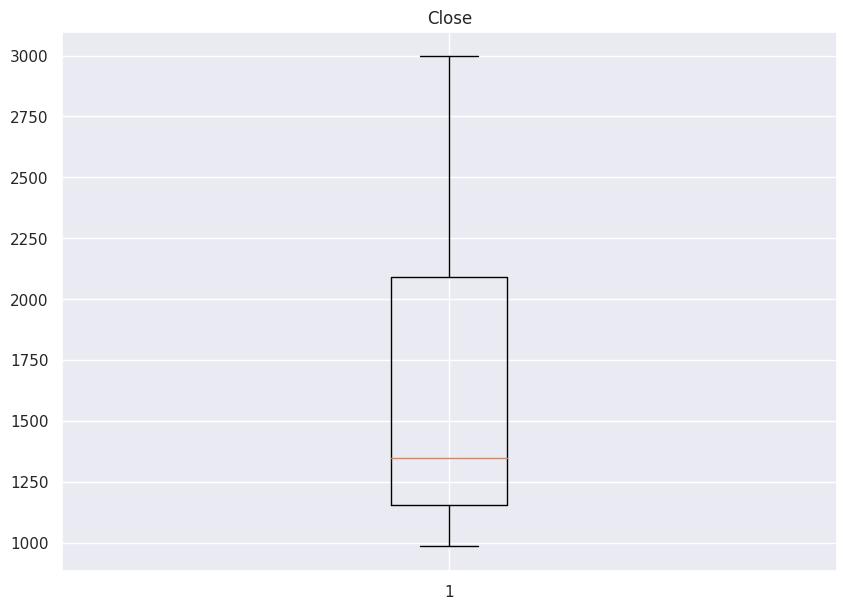

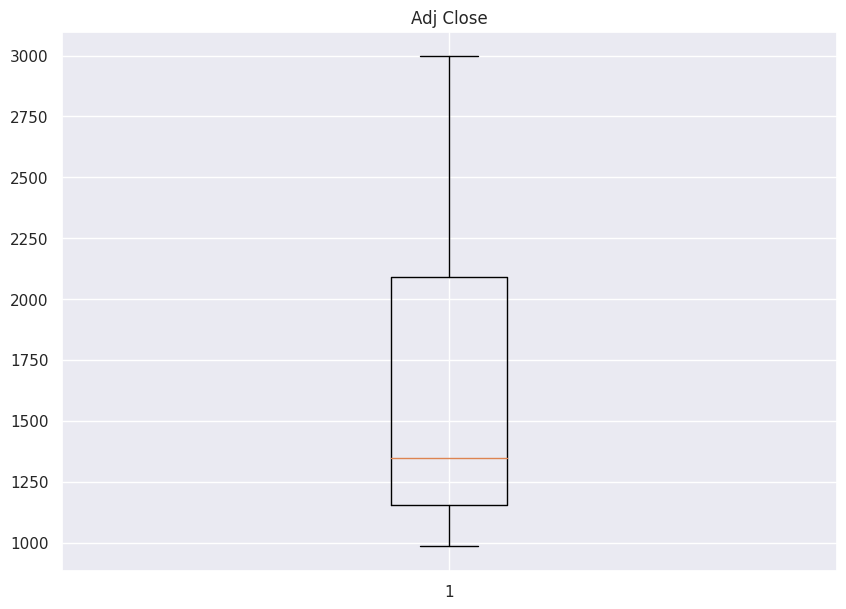

In [ ]:
#Checking for outliers
col=['Open',	'High',	'Low',	'Close',	'Adj Close']
for i in col:
  fig=plt.figure(figsize = (10,7))
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

There is no presence of outliers 

# **6. Exploratory Data Analysis**

### **Univariate Analysis**

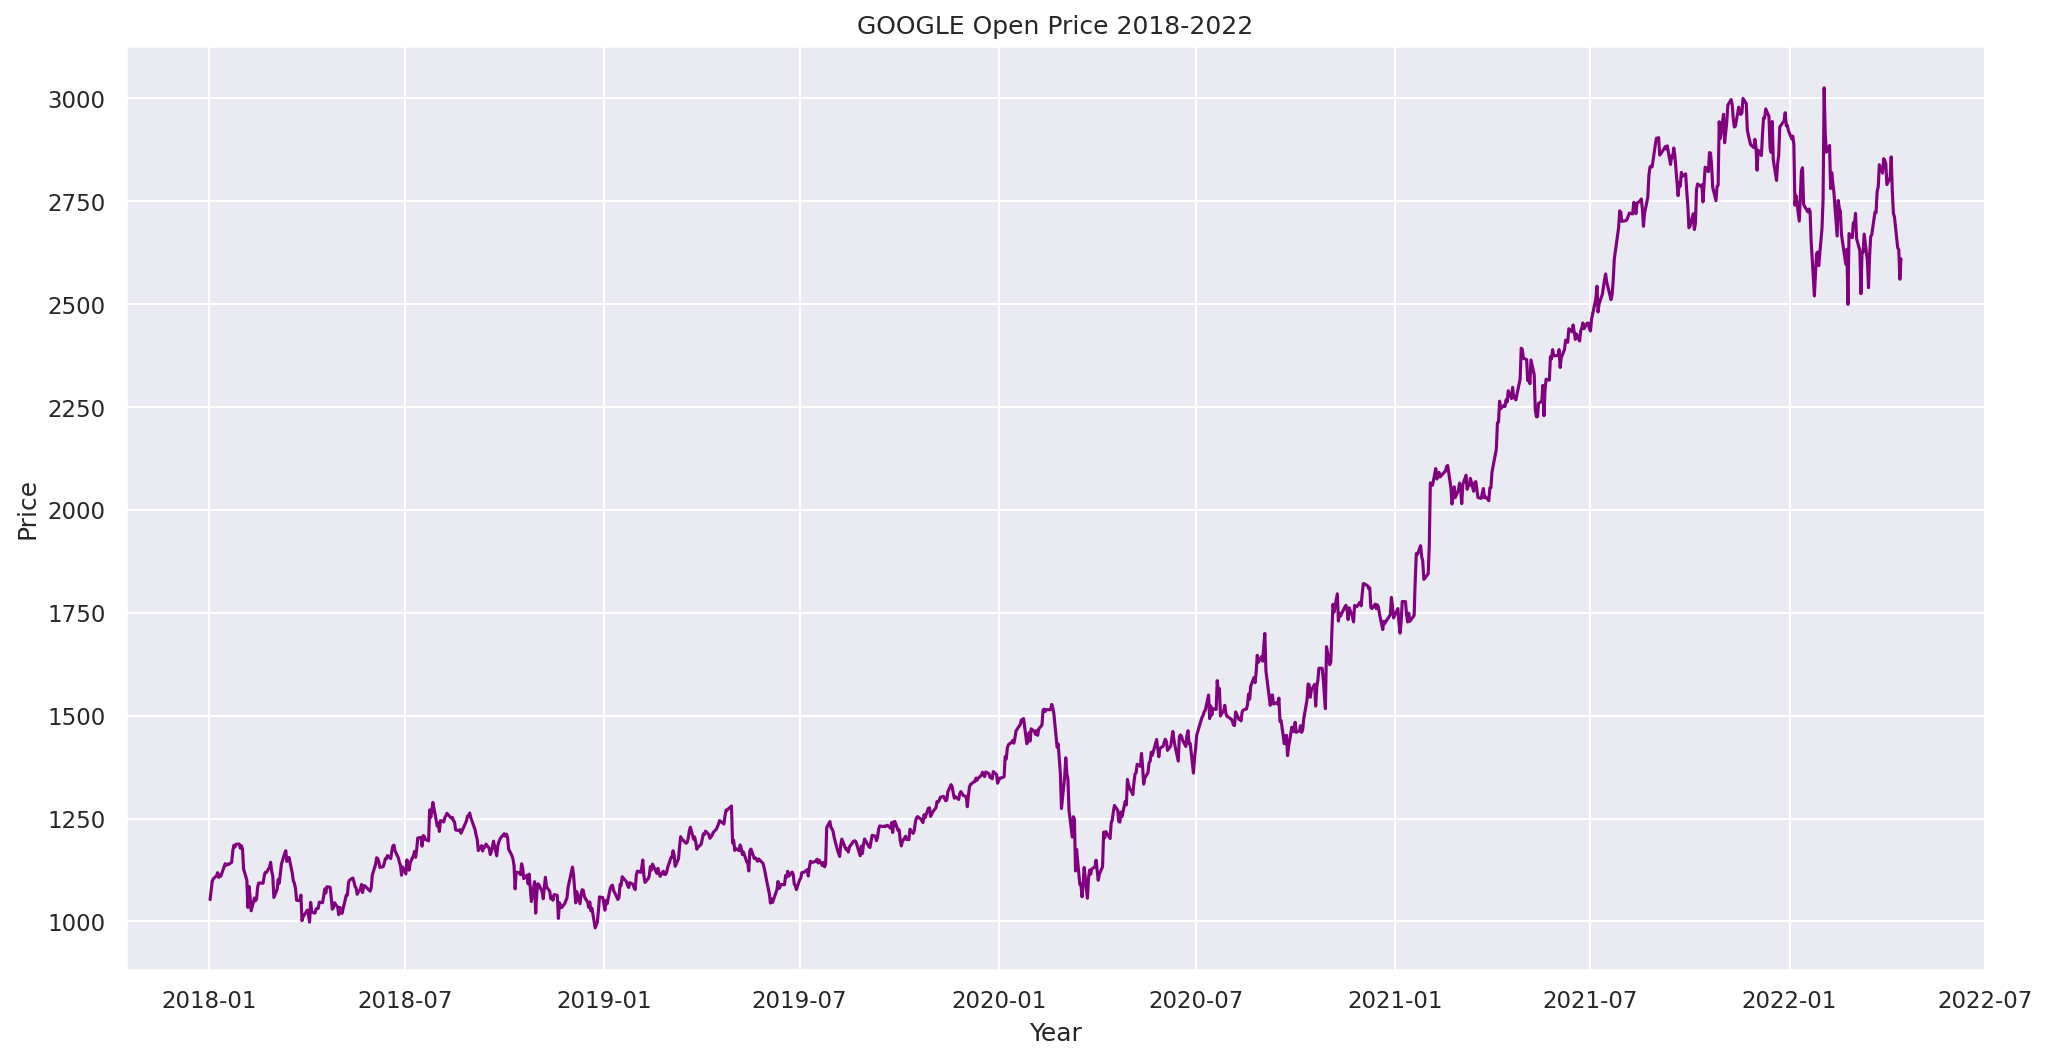

In [ ]:
#Plotting GOOGLE stock Open Price

open_data = data["Open"]
plt.figure(figsize=(16,8), dpi=150)
plt.plot(open_data, color= "Purple", label="GOOGL_OPENING PRICE")
plt.title('GOOGLE Open Price 2018-2022')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

From above visualization notice a drastic drop in price in 2020 around March this is due to the covid 19 pandemic

There is also a drop in 2022, this is due to the Ukraine-Russia war

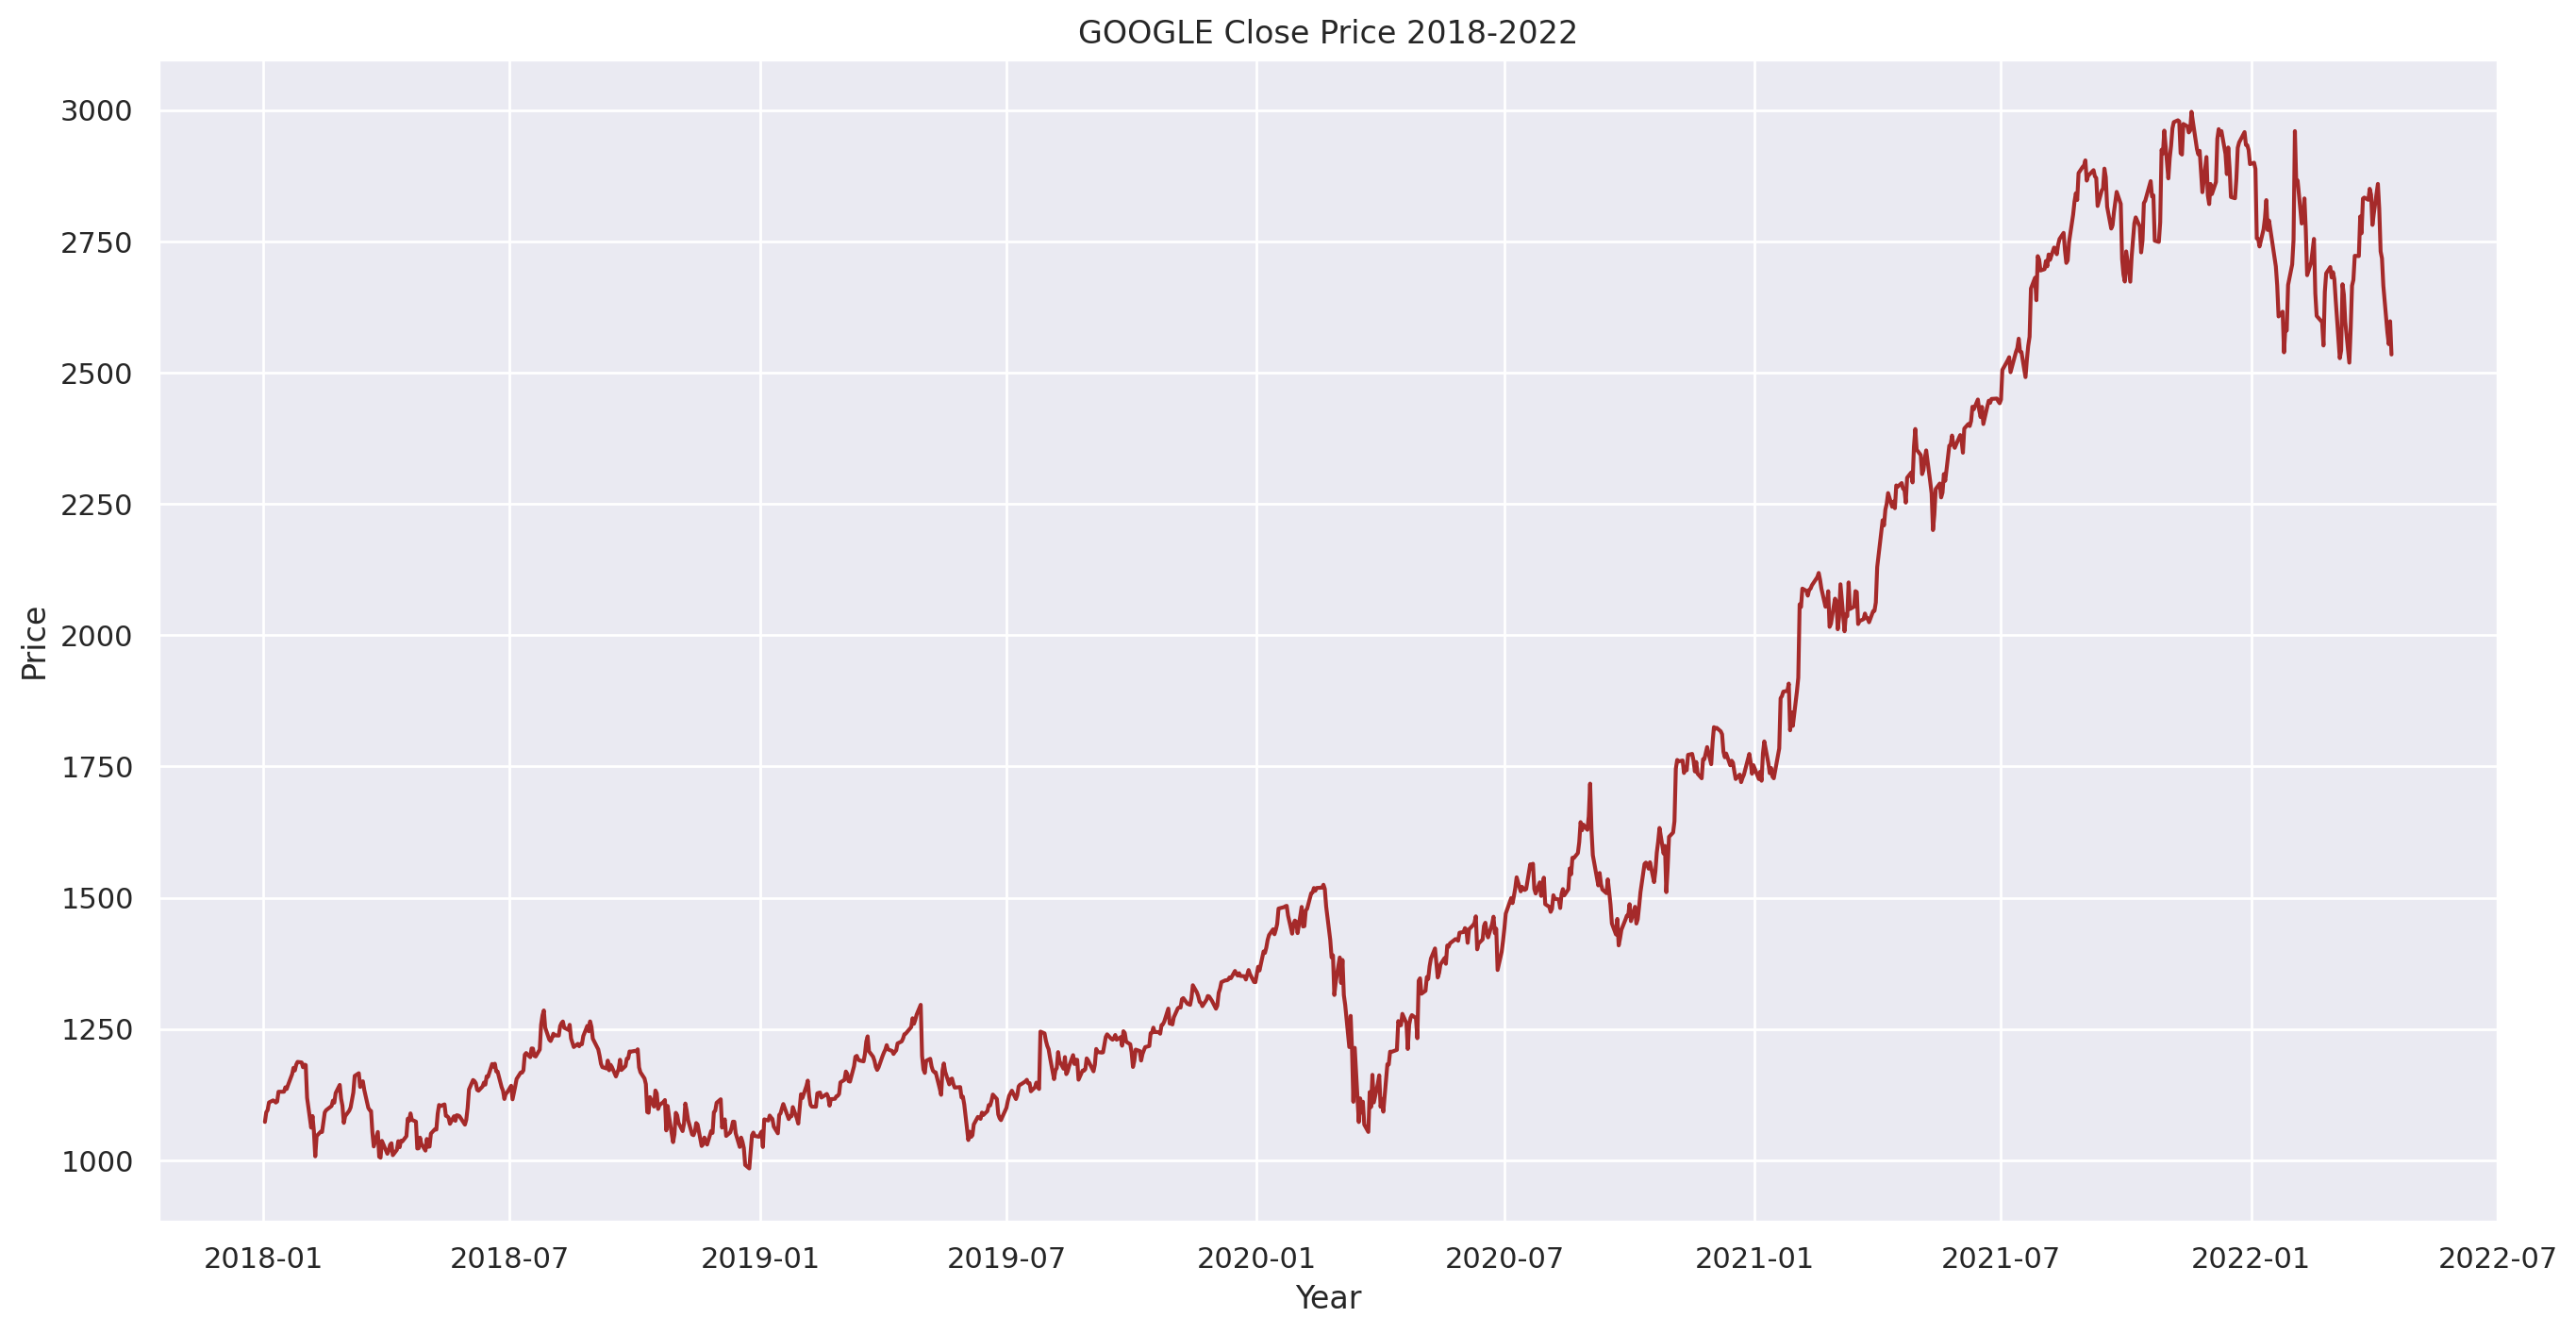

In [ ]:
#Plotting GOOGLE stock close Price
close_data = data["Close"]
plt.figure(figsize=(16,8), dpi=200)
plt.plot(close_data, color= "Brown", label="GOOGL_CLOSING PRICE")
plt.title('GOOGLE Close Price 2018-2022')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

From above visualization notice a drastic drop in price in 2020 around March this is due to the covid 19 pandemic

There is also a drop in 2022, this is due to the Ukraine-Russia war

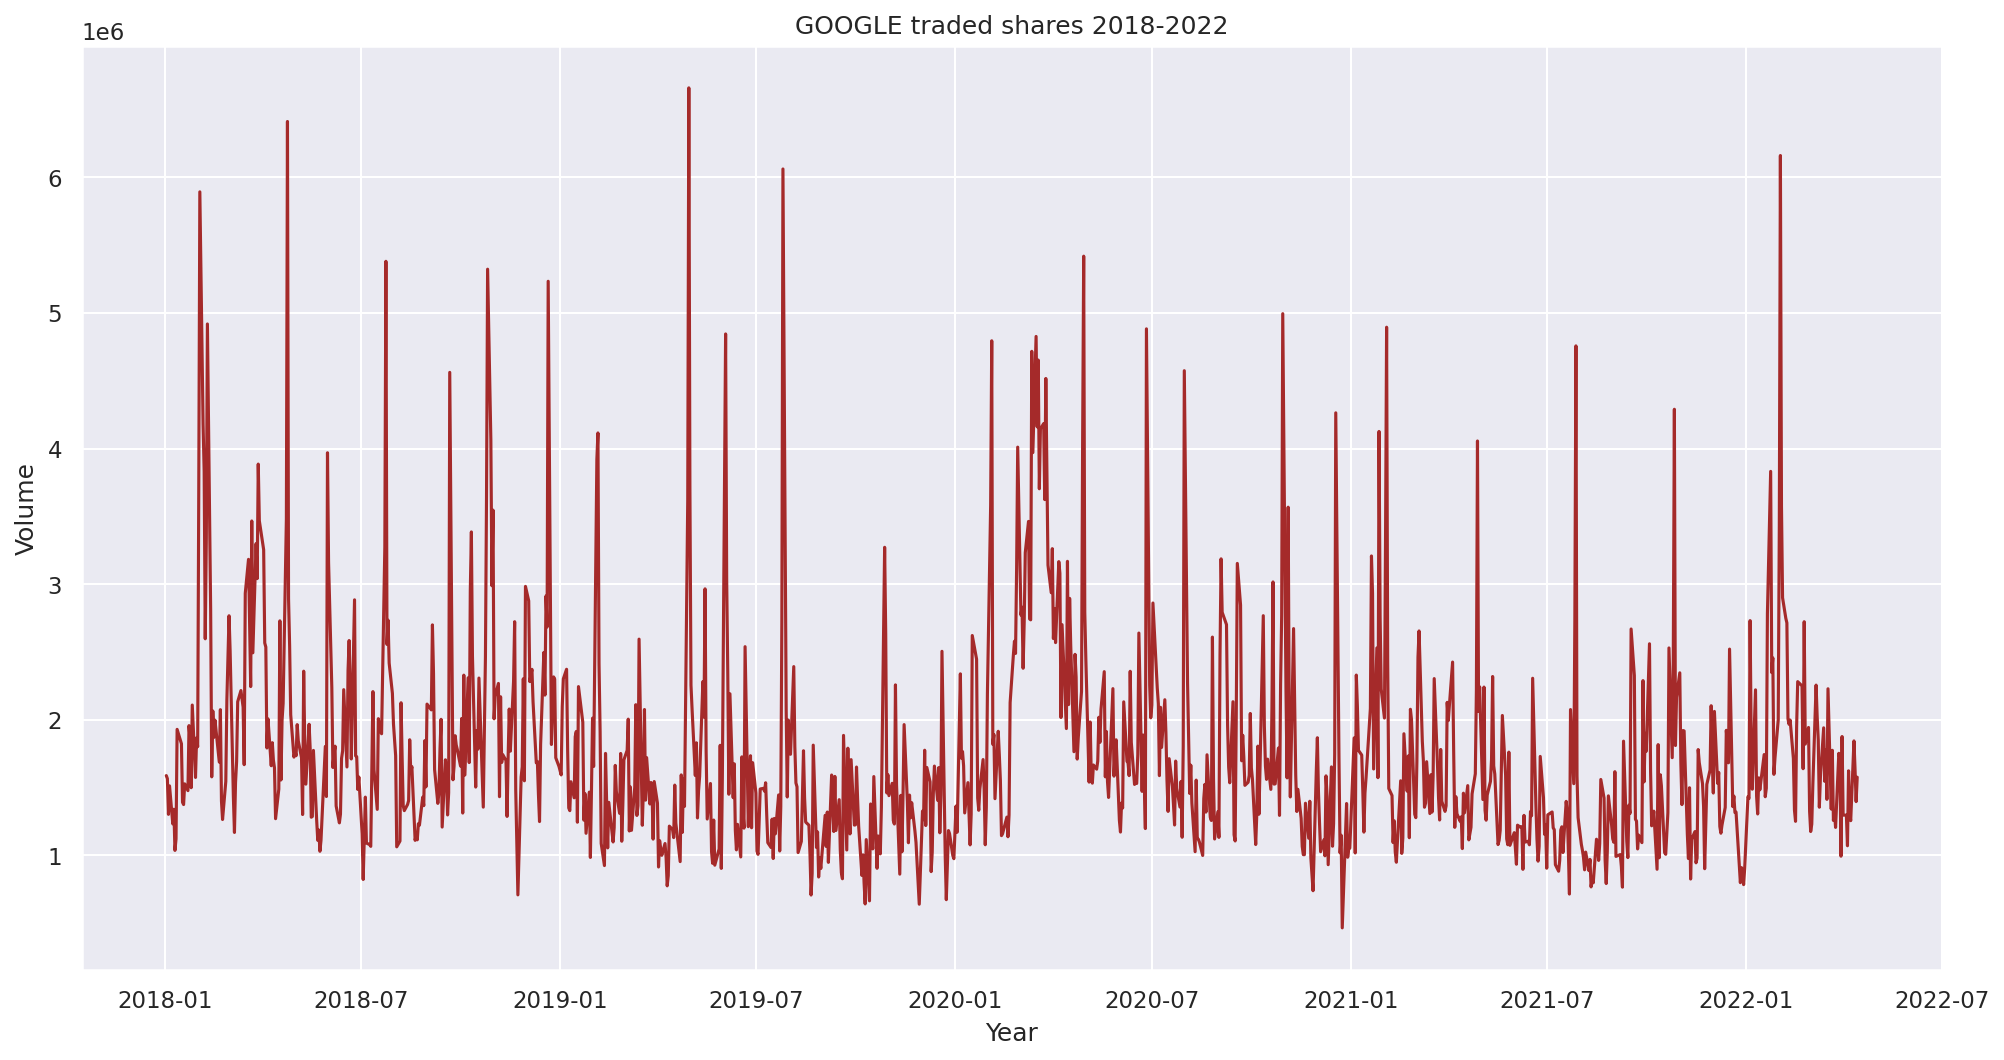

In [ ]:
#Plotting GOOGLE Volume(traded shares)

close_data = data["Volume"]
plt.figure(figsize=(16,8), dpi=150)
plt.plot(close_data, color= "Brown", label="GOOGL_CLOSING PRICE")
plt.title('GOOGLE traded shares 2018-2022')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

Notice there is a high spike in volume towards in the middle of 2019, this means that alot of shares were traded around that time

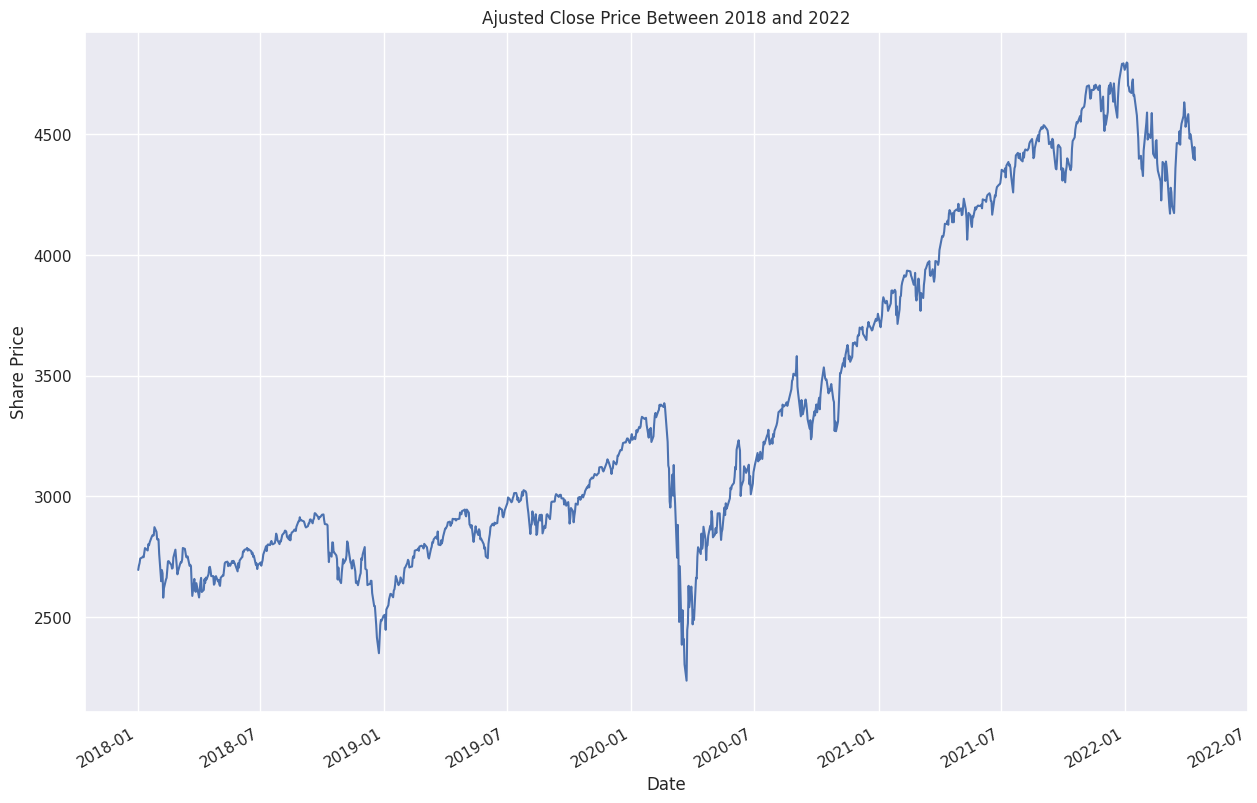

In [ ]:
 #Visualizing Ajusted Close Price Between 2018 and 2022
     
sp500['Adj Close'].plot(figsize=(15,10))    #SP500(Standard & Poor's 500 Index)is a stock market index tracking the 
                                            #performance of 500 large companies listed on stock exchanges in the US
plt.ylabel('Share Price')
plt.title('Ajusted Close Price Between 2018 and 2022');

The drastic drop in price in 2020 at around March is due to the Covid19 pandemic

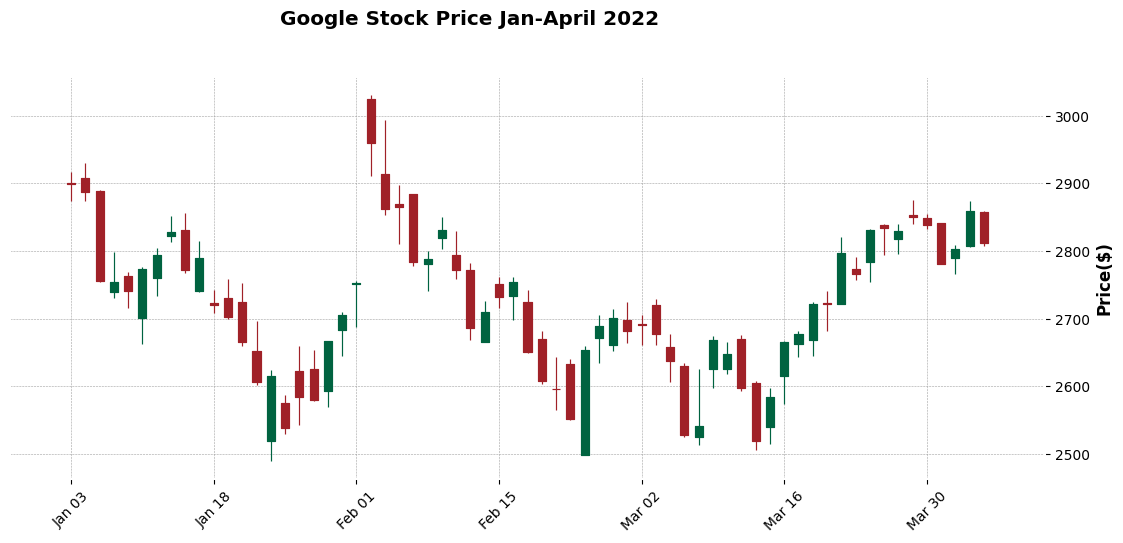

In [ ]:
#Plotting a Candleplot of the last 3 months

#Deriving the relevant period
dt_range = pd.date_range(start="2022-01-02", end="2022-04-05")
google_latest = data[data.index.isin(dt_range)]

#Plotting 
mpl.plot(google_latest, type='candle', style='charles', figratio =(10, 4), title= 'Google Stock Price Jan-April 2022', ylabel = 'Price($)',)

There is an increase in price on feb 02 this is due to an announcement by google that they have reduced the price of some their shares this news helped increase their stock up 11% in premarket trading

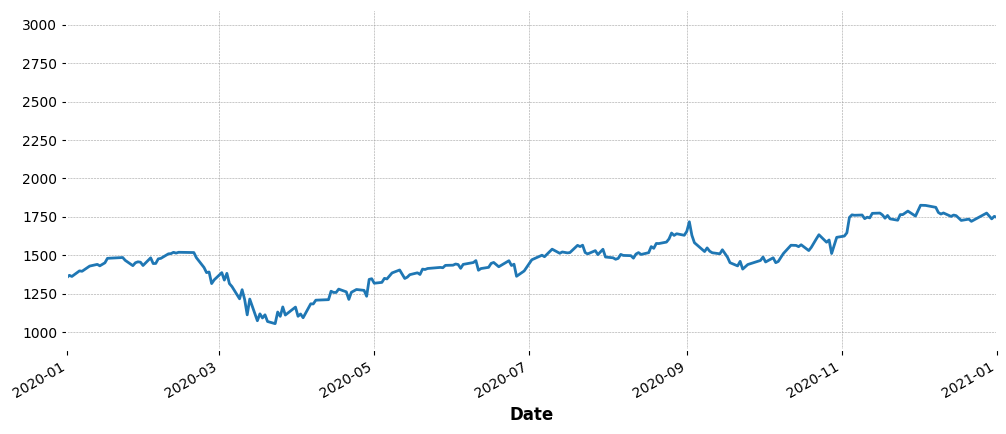

In [ ]:
#closing price for last year i.e 2020
data['Close'].plot(xlim=['2020-01-01','2021-01-01'],figsize =(12,5))
plt.show()

There is a drop in the closing price in the third month of 2020 till the fifth month this was largely caused by the covid 19 pandemic that hit hard around that time

The closing price picks up from the eleventh(November) month

In [ ]:
#Checking the Annual stock prices
data.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,6411000
2019-12-31,1364.000000,1367.050049,1353.000000,1362.469971,1362.469971,6658900
2020-12-31,1820.540039,1843.829956,1817.000000,1824.969971,1824.969971,5417900
2021-12-31,2999.510010,3019.330078,2977.979980,2996.770020,2996.770020,4894100
2022-12-31,3025.000000,3030.929932,2910.449951,2960.000000,2960.000000,6160000


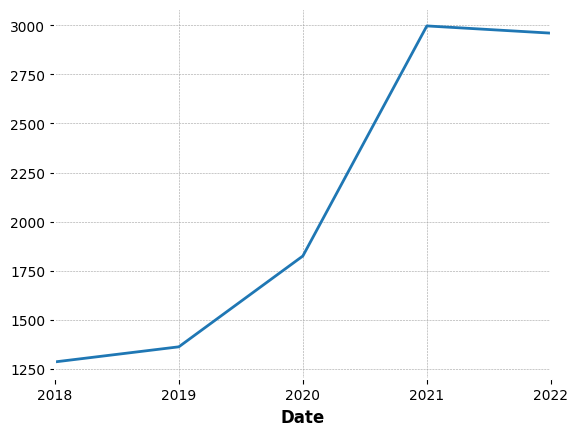

In [ ]:
#maximum price at the end of every year
data.resample(rule='A').max()['Close'].plot()
plt.show()

2021 has the highest closing price among the years

In [ ]:
# Monthly stock price
data.resample(rule='M').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-31,1188.000000,1198.000000,1184.060059,1187.560059,1187.560059,2108500
2018-02-28,1175.989990,1187.449951,1169.359985,1181.589966,1181.589966,5892100
2018-03-31,1171.829956,1178.160034,1159.199951,1165.930054,1165.930054,3884900
2018-04-30,1084.270020,1097.510010,1072.099976,1089.449951,1089.449951,6411000
2018-05-31,1105.569946,1118.150024,1104.800049,1106.599976,1106.599976,3968400
2018-06-30,1185.510010,1201.489990,1182.030029,1184.069946,1184.069946,3160100
2018-07-31,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,5380000
2018-08-31,1263.400024,1271.959961,1260.099976,1264.650024,1264.650024,2125300
2018-09-30,1222.520020,1227.869995,1206.560059,1211.310059,1211.310059,4561100


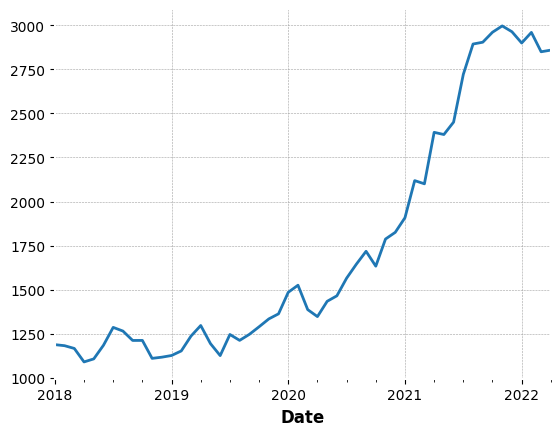

In [ ]:
#Month with highest closing price
data.resample(rule='M').max()['Close'].plot()
plt.show()

November 2021 was the month with highest closing price

In [ ]:
#Quaterly stock prices
data.resample(rule='QS').max().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,1188.000000,1198.000000,1184.060059,1187.560059,1187.560059,5892100
2018-04-01,1185.510010,1201.489990,1182.030029,1184.069946,1184.069946,6411000
2018-07-01,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,5380000
2018-10-01,1213.000000,1224.520020,1203.189941,1211.530029,1211.530029,5321900
2019-01-01,1228.849976,1236.439941,1216.579956,1236.130005,1236.130005,4114800


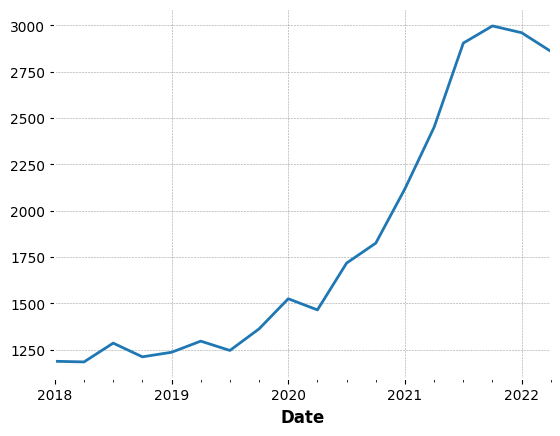

In [ ]:
#Quarterly frequency
data.resample(rule='QS').max()['Close'].plot()
plt.show()

Huge jump in the google stock prices from Q1 of 2020 to 2021 Q2

### **Bivariate Analysis**

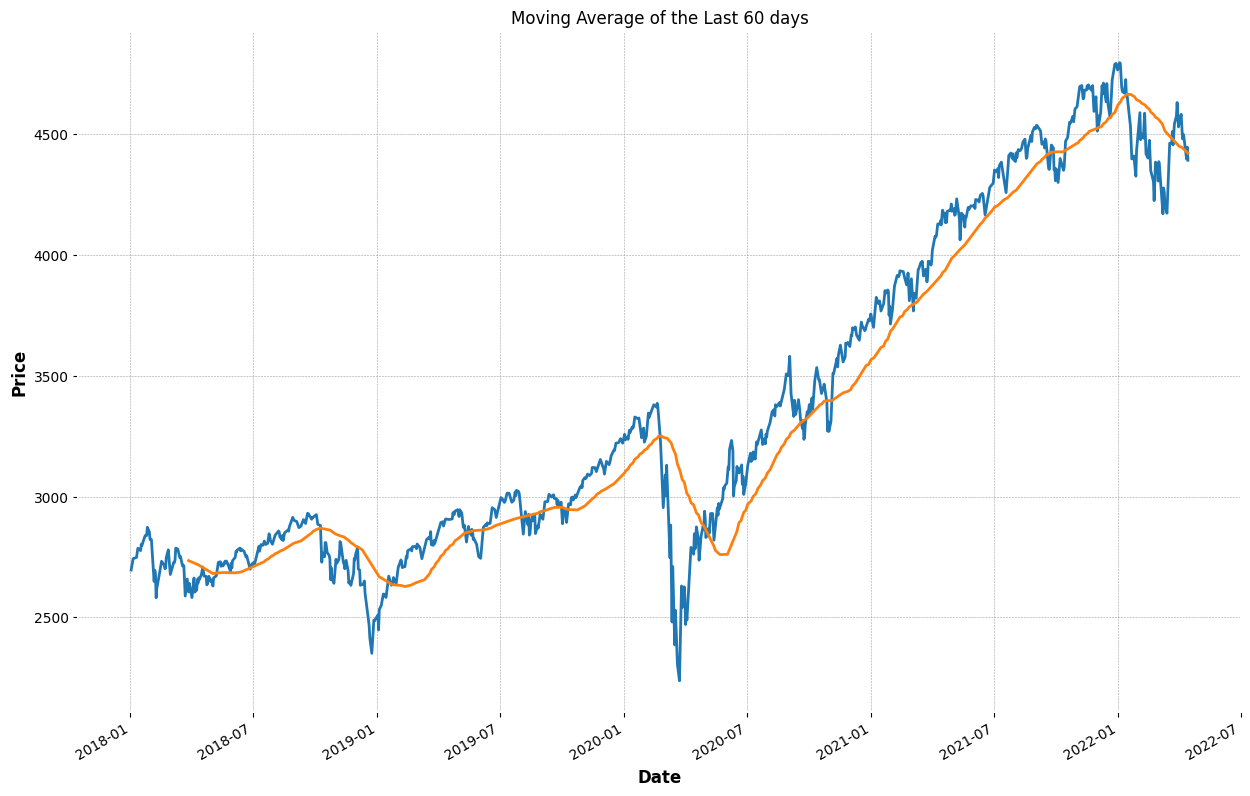

In [ ]:
#Computing and visualizing the moving average of sp500 over the last 60 days
sp500['Close'].plot(figsize=(15,10))                        

#Leveraging pandas' rolling.mean to compute the trends over a window of 60
sp500.rolling(window=60).mean()['Close'].plot()

#Plotting the results
plt.ylabel('Price')
plt.title('Moving Average of the Last 60 days');

With a Rolling Mean, we are able to 'smoothen' out the miniature fluctuations in the dataset and to clearly decipher the trends in the data. 

Our rolling mean suggests that notwithstanding the declines in the prices over the years, the price has generally tended to have a positive upward trend between 2018 and 2022.

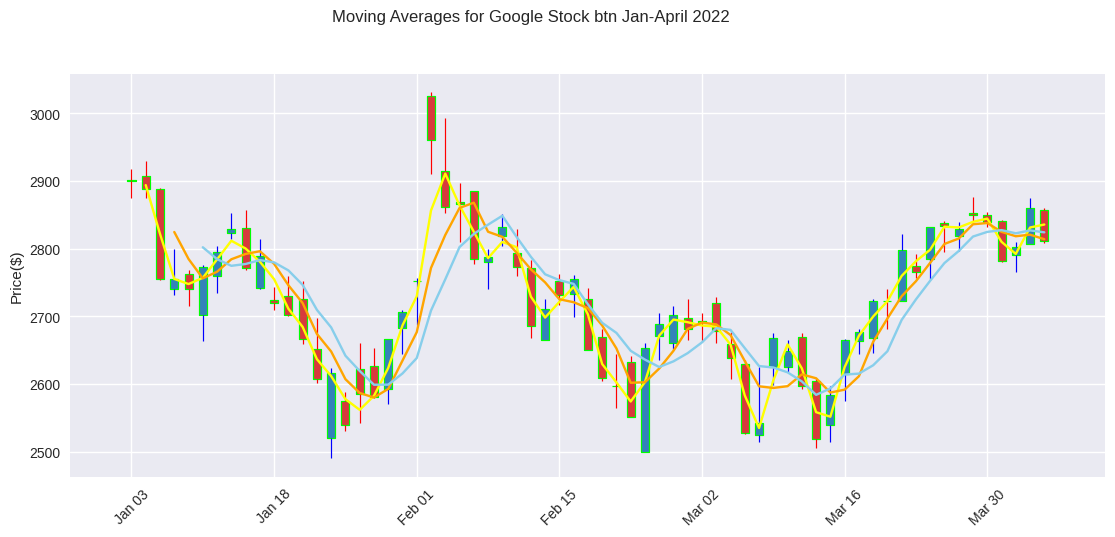

In [ ]:
#Computing the moving averages over the last 4 months

#Levergaing the power of Matplotlib for finance we define the colors for the
#candlestick
make = mpl.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

#Defining the style to use in the plot using the make_mpf_style method and the base_mpl_style parameter
sborn = mpl.make_mpf_style(base_mpl_style="seaborn", marketcolors=make, mavcolors=["yellow","orange","skyblue"])


#Plotting 
mpl.plot(google_latest, type='candle', style=sborn, title= 'Moving Averages for Google Stock btn Jan-April 2022', ylabel = 'Price($)', figratio =(10,4), mav= (2, 4, 6))


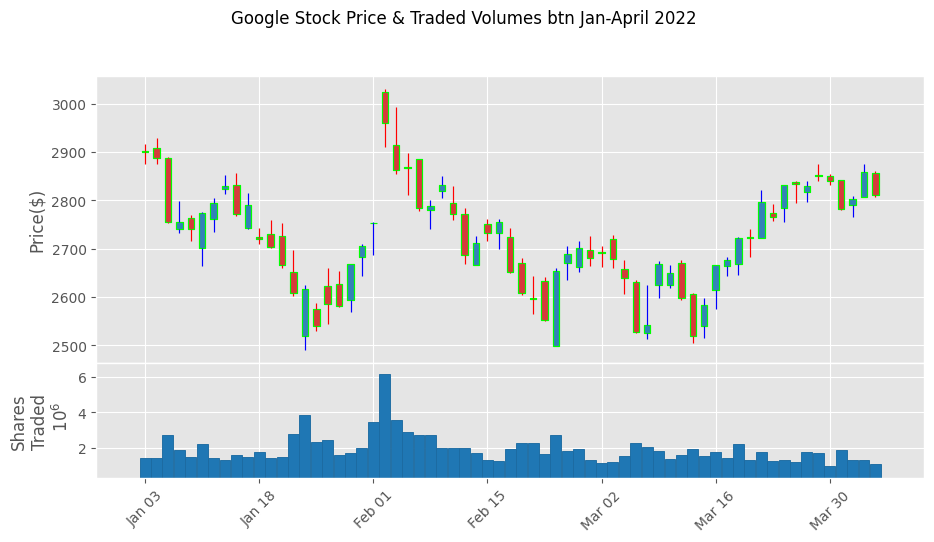

In [ ]:
#Defining the styling colors
col_collect = mpl.make_marketcolors(up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='tab:blue')
#Style for the plot
style_plot = mpl.make_mpf_style(base_mpl_style ="ggplot", marketcolors = col_collect)

#Specifying Volume is True as the plot will include volume of shares traded

mpl.plot(google_latest, type='candle', style=style_plot, volume = True, ylabel_lower= 'Shares\nTraded', title= 'Google Stock Price & Traded Volumes btn Jan-April 2022', ylabel = 'Price($)', figratio =(8,4))

In [ ]:
#Computing the Returns on the SP500 using log
%time sp500['Return'] = np.log(sp500['Close']/ sp500['Close'].shift(1))

CPU times: user 2.57 ms, sys: 0 ns, total: 2.57 ms
Wall time: 2.77 ms


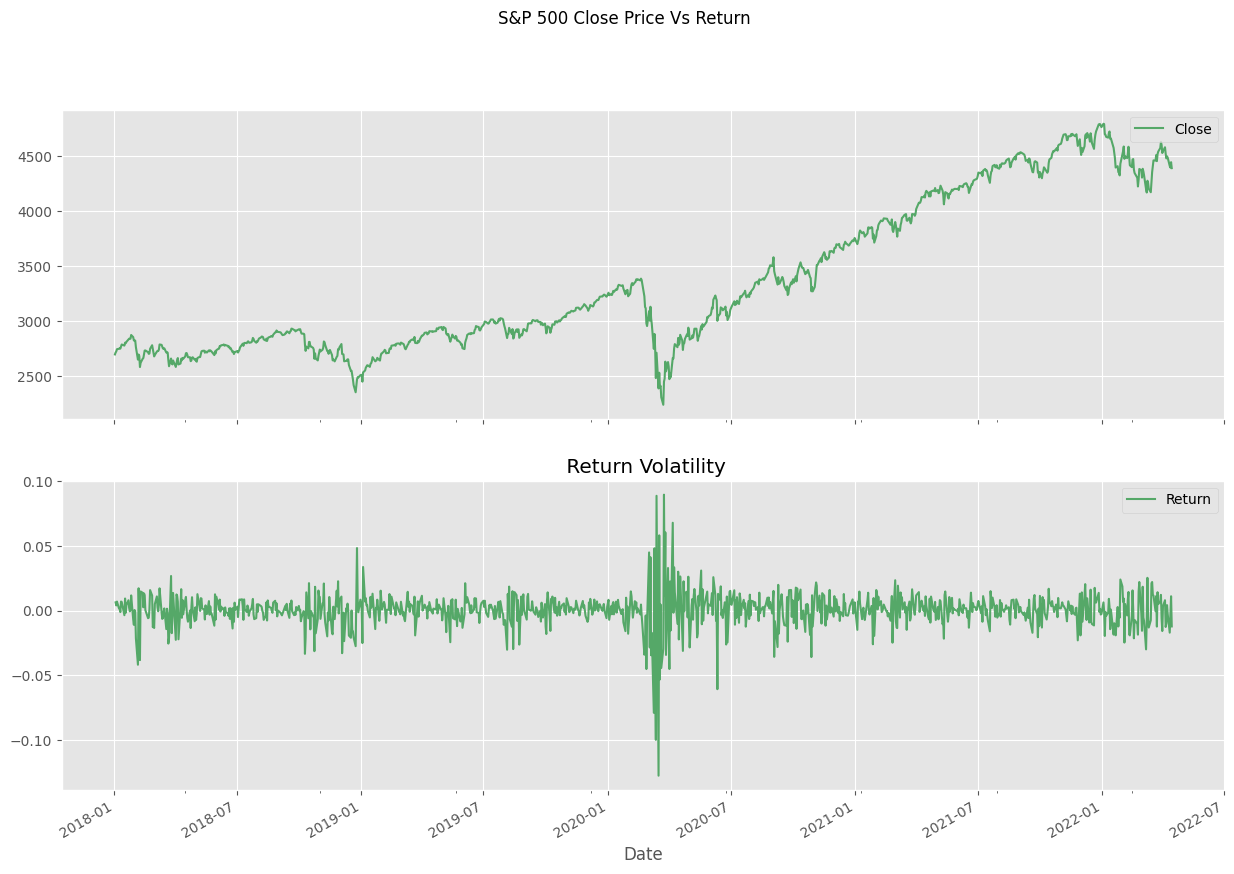

In [ ]:
sp500[['Close', 'Return']].plot(subplots=True, style='g', figsize=(15, 10), title='S&P 500 Close Price Vs Return')
plt.title(' Return Volatility');

We deduce two stylized facts of equity returns from the plot above:

1. Volatility Clustering

The movement in the graph overtime suggests that volatility is not constant.The spike in 2019 is at the peak of the US-China trade wars, Italian elections and Donald Trumps threat of sacking the chairperson of the FED.

In 2020, we see the highest levels of volatility possibly driven by Covid and the significant drop in oil prices due to an oversupply of oil in the markets.


2. Leverage effect

It is clear that there is a negative correlation between volatility and market returns. When the markets prices are low, the stocks are at the highest volatility and vice versa.

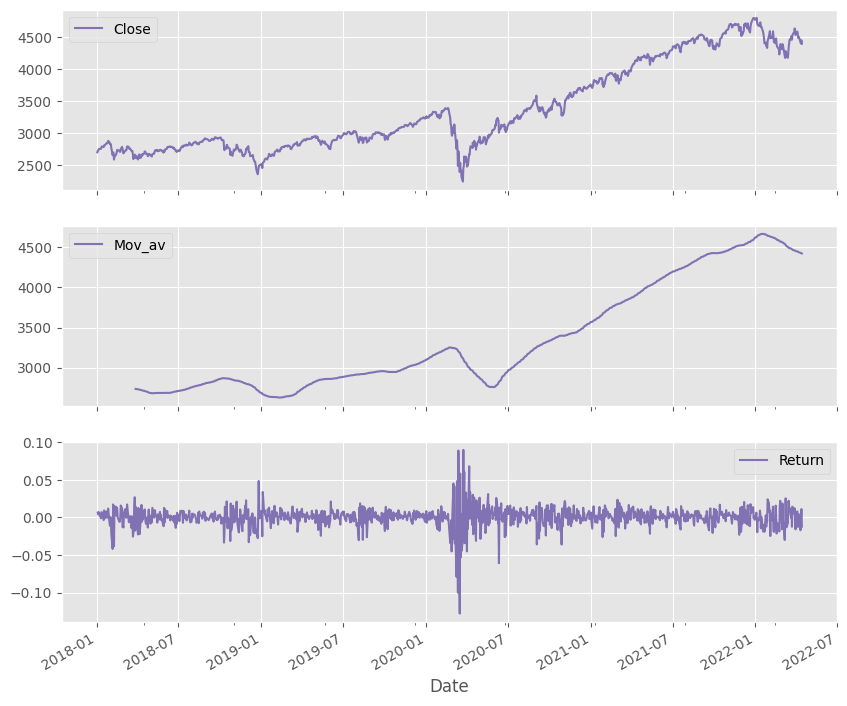

In [ ]:
#moving average, return and adj close using the sp500 index
sp500["Mov_av"] = sp500.rolling(window=60).mean()['Close']


sp500[['Close', 'Mov_av', 'Return' ]].plot(subplots = True, style='m', figsize=(10, 9));

Moving averages are Used in time series to smoothen variations:

i) Cumulative moving average - is the mean of the previous values up to the current

ii) Exponential moving average - it gives more weight to recent data points this means the weight of each element decreases overtime

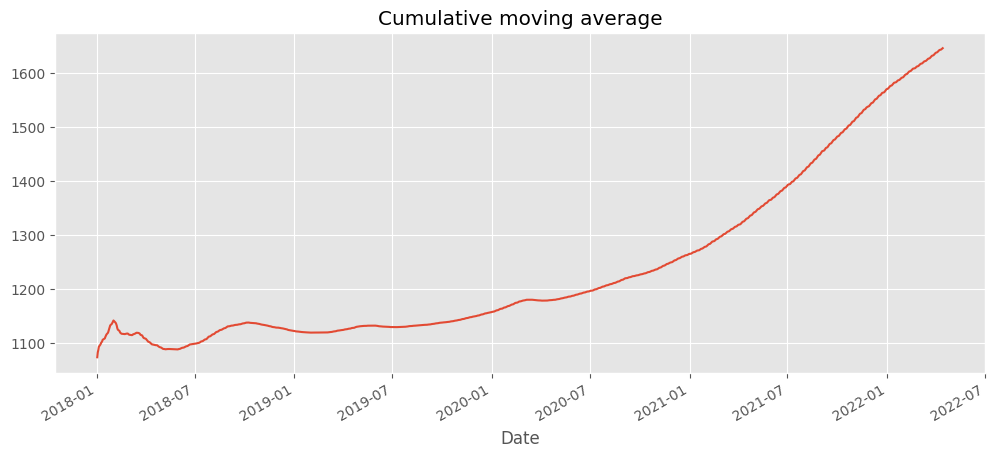

In [ ]:
#cumulative moving average
data['Close'].expanding().mean().plot(figsize=(12,5))
plt.title('Cumulative moving average')
plt.show()

Upward trend from seventh month of 2020

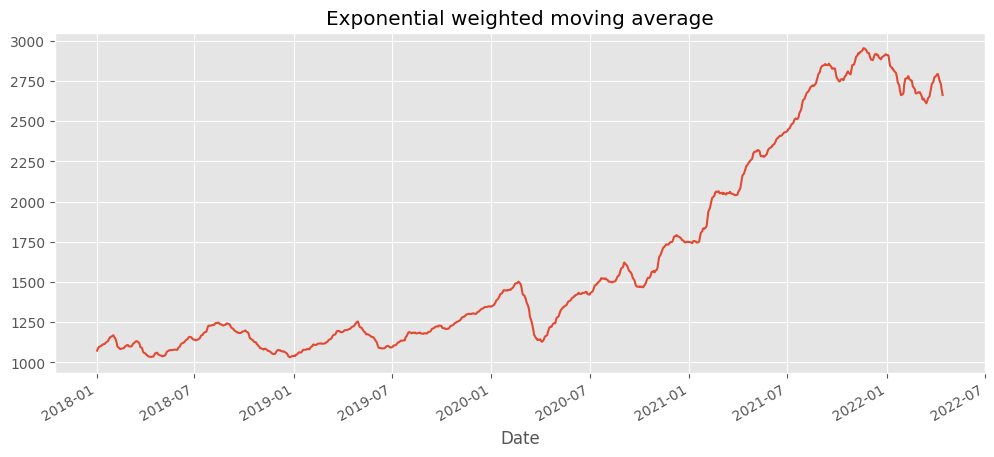

In [ ]:
#Exponential weighted moving average
#We provide weights to the recent data
#To prevent lags
data['Close'].ewm(span=12).mean().plot(figsize=(12,5))
plt.title('Exponential weighted moving average')
plt.show()

In [ ]:
#Exponential moving average
data['ewma-12'] = data['Close'].ewm(span=12).mean()

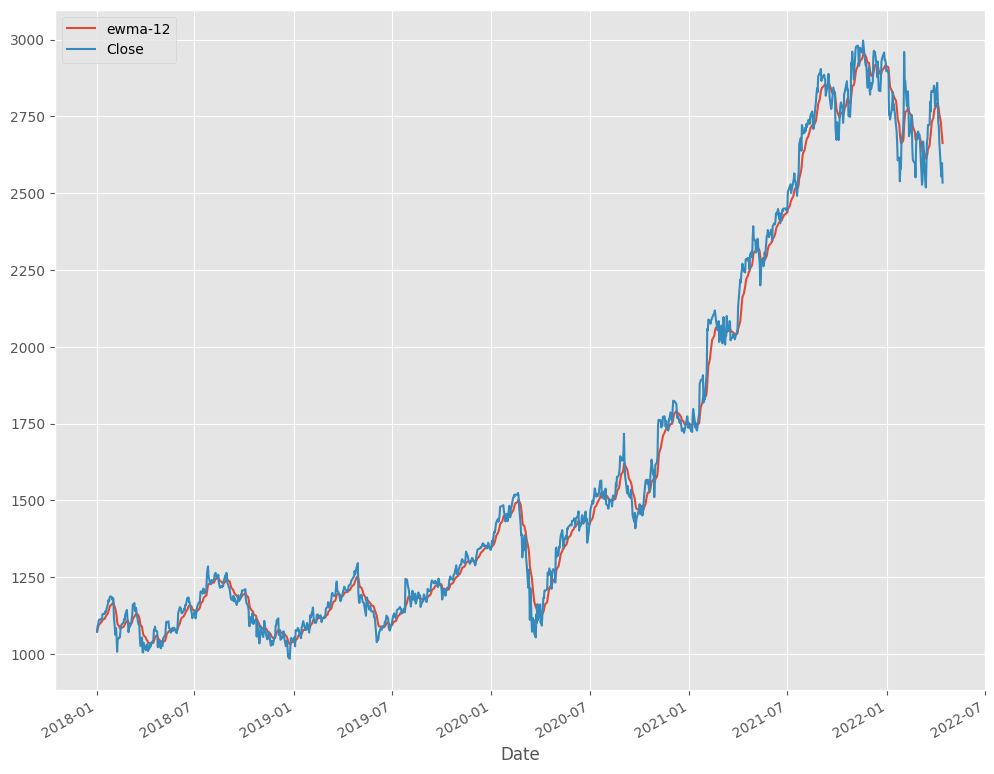

In [ ]:
# comparing the Exponential moving average to the close variable
data[['ewma-12', 'Close']].plot(figsize=(12, 10));

# **MODEL DEVELOPMENT**

In this section, we will focus on building model that accurately forecast the stock prices. 



**Data Preparation**

One key assumption we make when working with Time Series data is that the data is stationary i.e., that for each lag the mean, variance and autocorrelation of the data do not vary across time. 

What we would like to avoid is that the data shows a strong trend towards a particular direction (**seasonality**). 

Stationary Time Series data make the process of model development efficient. Before attempting any model development, we will satisfy ourselves that our data is stationary. Should the data not be stationary, we will use established methods to make it stationary.

We use the Augmented Dick Fuller Test to check for stationality. 

The basic objective of the test is to test the null hypothesis that  =1

yt =  y t 1 + u t

against the one sided alternative 
 <1. 

Thus, Our Hypothesis is:

H
0 : series contains a unit root

and 

H 1 : series is stationary

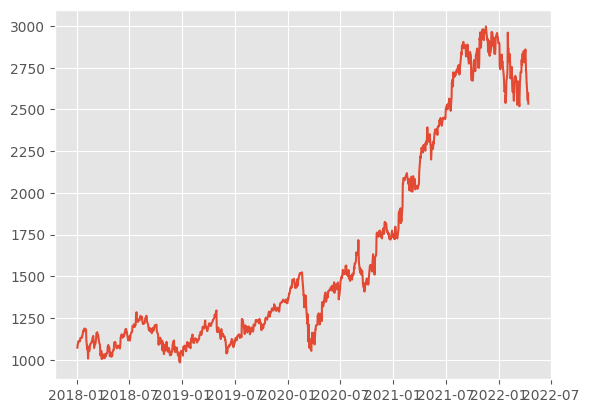

In [ ]:
station_check = data['Close']

plt.plot(station_check);

In [ ]:
X = station_check.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

#Checking the Results 
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -0.067550
p-value: 0.952576
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


We have established that the data is non-stationary. We therefore need to transform it to a stationary form otherwise we will have spurious results in the implementation of the model.

In [ ]:
df = data

In [ ]:
#transforming the data into stationary
df['trans_1'] = df['Close'].diff(periods=1)

df['trans_2'] = df['Close'].diff(periods=2)

df['trans_3'] = df['Close'].diff(periods=3)

df.head()

,Open,High,Low,Close,Adj Close,Volume,ewma-12,trans_1,trans_2,trans_3
Date,,,,,,,,,,
2018-01-02,1053.020020,1075.979980,1053.020020,1073.209961,1073.209961,1588300,1073.209961,NaN,NaN,NaN
2018-01-03,1073.930054,1096.099976,1073.430054,1091.520020,1091.520020,1565900,1083.127909,18.310059,NaN,NaN
2018-01-04,1097.089966,1104.079956,1094.260010,1095.760010,1095.760010,1302600,1088.058221,4.239990,22.550049,NaN
2018-01-05,1103.449951,1113.579956,1101.800049,1110.290039,1110.290039,1512500,1095.075937,14.530029,18.770020,37.080078
2018-01-08,1111.000000,1119.160034,1110.000000,1114.209961,1114.209961,1232200,1100.274583,3.919922,18.449951,22.689941


In [ ]:
#Checking whether we have achieved our goal in the first order of difference

df_clean = df['trans_1'].dropna()
X = df_clean.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

#Checking the Results 
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")


ADF Statistic: -7.543045
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Reject Ho - Time Series is Stationary


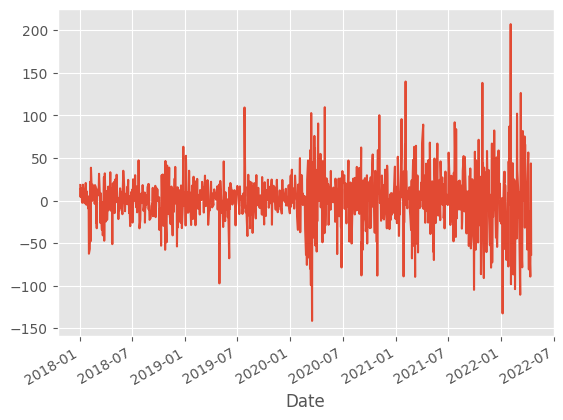

In [ ]:
#visualization of the stationary dataframe
df_clean.plot();

We have succeeded in making the data stationary.

## Univariate Time series 

This means we will be focusing on one variable to make our predictions which will be our close variable

### stock Market

Here we will be predicting how the general market's stock price will be

In [ ]:
sp500 = yf.download('^GSPC',
start='2018-01-01',
end='2021-08-01',
progress=False, actions='inline')

In [ ]:
#Data Preparation and Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(sp500['Close'].values.reshape(-1,1))

prediction_days = 60


In [ ]:
#Instantiating Empty X_train and Y_train
X_train = []
y_train = []



for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Instantiate Sequential Model
model = Sequential()

#Adding Layer One
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#Dropping some features
model.add(Dropout(0.2))

#Adding Layer two
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#Adding Layer three
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Adding the Output Layer
model.add(Dense(units=1))

In [ ]:
#Fitting the Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 35, batch_size = 32)

Epoch 1/35
27/27 [==============================] - 7s 42ms/step - loss: 0.0358
Epoch 2/35
27/27 [==============================] - 1s 42ms/step - loss: 0.0060
Epoch 3/35
27/27 [==============================] - 1s 42ms/step - loss: 0.0060
Epoch 4/35
27/27 [==============================] - 1s 43ms/step - loss: 0.0046
Epoch 5/35
27/27 [==============================] - 1s 43ms/step - loss: 0.0048
Epoch 6/35
27/27 [==============================] - 1s 43ms/step - loss: 0.0045
Epoch 7/35
27/27 [==============================] - 1s 43ms/step - loss: 0.0045
Epoch 8/35
27/27 [==============================] - 1s 42ms/step - loss: 0.0040
Epoch 9/35
27/27 [==============================] - 1s 42ms/step - loss: 0.0036
Epoch 10/35
27/27 [==============================] - 1s 42ms/step - loss: 0.0039
Epoch 11/35
27/27 [==============================] - 1s 42ms/step - loss: 0.0036
Epoch 12/35
27/27 [==============================] - 1s 42ms/step - loss: 0.0039
Epoch 13/35
27/27 [==================

In [ ]:
#Deriving Test Data
test_data = yf.download('^GSPC',
start='2021-08-08',
end='2022-04-12',
progress=False, actions='inline')

In [ ]:
actual_prices = test_data['Close'].values


all_data = pd.concat((sp500['Close'], test_data['Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [ ]:
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(X_test)

#Reverse scaling the prices

predicted_prices = scaler.inverse_transform(predicted_prices)


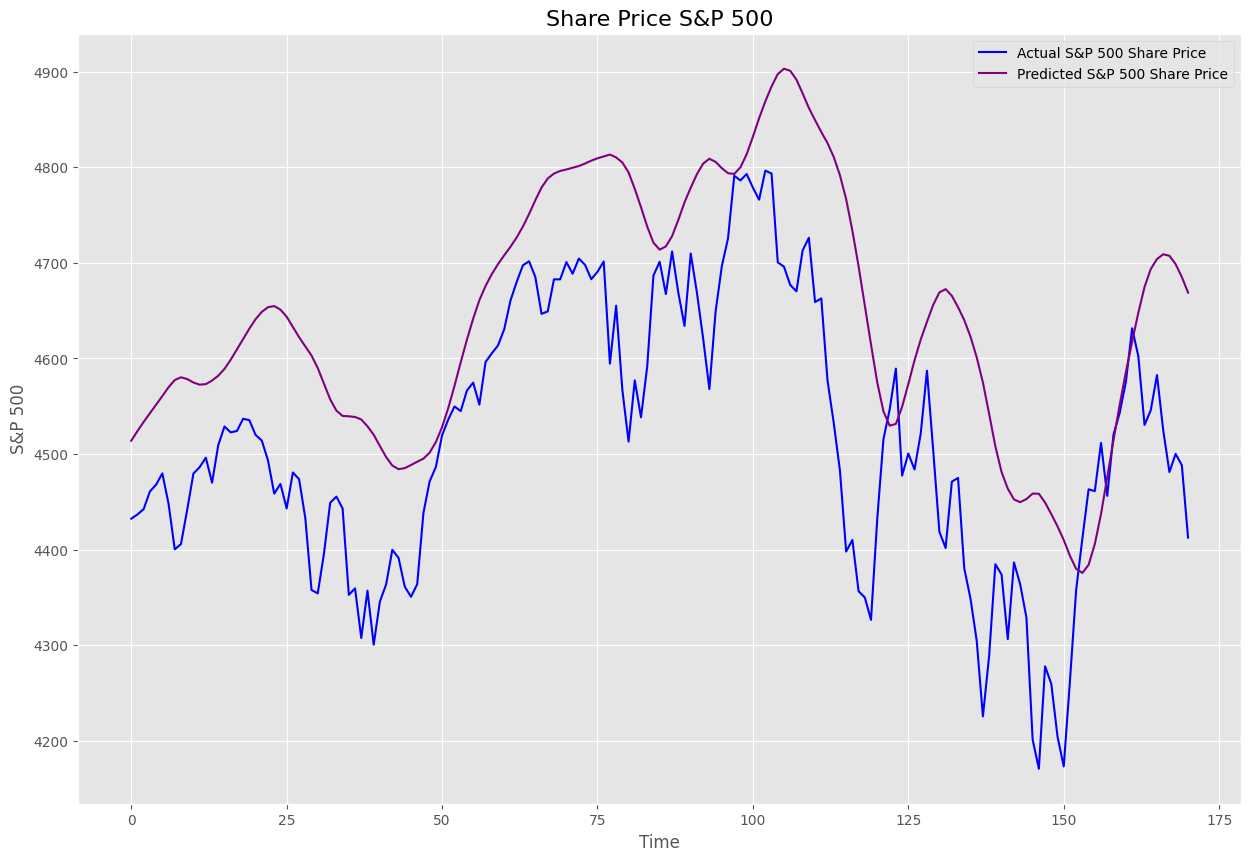

In [ ]:
#Plotting the Predictions on Test Data
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'blue', label = 'Actual S&P 500 Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted S&P 500 Share Price')
plt.title('Share Price S&P 500', fontsize=16)
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend();


In [ ]:
rmse = np.sqrt(np.mean(predicted_prices -actual_prices)**2)
rmse

128.77246950383773

### LSTM

We will focus on the close(closing price) variable for our prediction

In [ ]:
df1=data.reset_index()['Close']

In [ ]:
df1

0       1073.209961
1       1091.520020
2       1095.760010
3       1110.290039
4       1114.209961
           ...     
1075    2665.750000
1076    2576.469971
1077    2554.290039
1078    2597.879883
1079    2534.600098
Name: Close, Length: 1080, dtype: float64

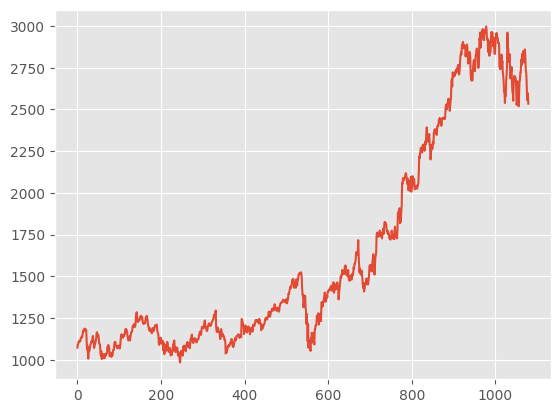

In [ ]:
plt.plot(df1)
plt.show()

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


For this model we will use 65% of the data as our training size

In [ ]:
#the size of train and test 
training_size,test_size


(702, 378)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
#Extra pollation
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
#shape of x train and y train
print(X_train.shape), print(y_train.shape)

(601, 100)
(601,)


(None, None)

In [ ]:
#shape of x test and y test
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
#reshape to 3D
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
#we used the optimizer Adam because of its high performance and fast convergence compared to other alternative optimizer 
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1), activation = 'relu')) #activation relu
model.add(LSTM(100,return_sequences=True)) #50 before
model.add(LSTM(100))
model.add(Dense(1))  #ouput
model.compile(loss='mean_squared_error',optimizer='adam')

For this model we used 3layers each with 100 neurons

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 100, 100)          40800     
                                                                 
 lstm_18 (LSTM)              (None, 100, 100)          80400     
                                                                 
 lstm_19 (LSTM)              (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting the model
history_1 = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 9s 442ms/step - loss: 0.0067 - val_loss: 0.2003
Epoch 2/100
10/10 [==============================] - 3s 310ms/step - loss: 0.0022 - val_loss: 0.0408
Epoch 3/100
10/10 [==============================] - 3s 311ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 4/100
10/10 [==============================] - 3s 321ms/step - loss: 9.8998e-04 - val_loss: 0.0021
Epoch 5/100
10/10 [==============================] - 3s 328ms/step - loss: 8.7973e-04 - val_loss: 0.0053
Epoch 6/100
10/10 [==============================] - 3s 312ms/step - loss: 7.8655e-04 - val_loss: 0.0038
Epoch 7/100
10/10 [==============================] - 3s 302ms/step - loss: 7.0228e-04 - val_loss: 0.0085
Epoch 8/100
10/10 [==============================] - 3s 326ms/step - loss: 6.4817e-04 - val_loss: 0.0069
Epoch 9/100
10/10 [==============================] - 3s 308ms/step - loss: 5.9197e-04 - val_loss: 0.0106
Epoch 10/100
10/10 [==============================] - 3s 306ms/step

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
### Calculate MSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.013840627110497264

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.048378781127131794

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest,test_predict)


0.8551940894171579

In [ ]:
overfit=np.subtract(test_predict,ytest)

pd.DataFrame(overfit).describe()

overfit.mean()

-0.0044038660681205224

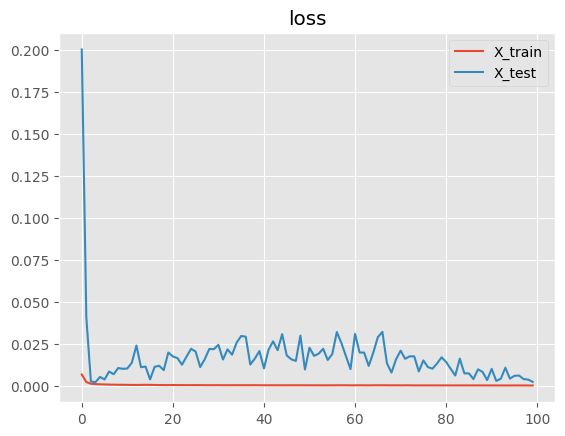

In [ ]:
##plotting for loss during training
from matplotlib import pyplot
plt.subplot()
plt.title("loss")
plt.plot(history_1.history["loss"],label="X_train")
plt.plot(history_1.history["val_loss"], label="X_test")
plt.legend();

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

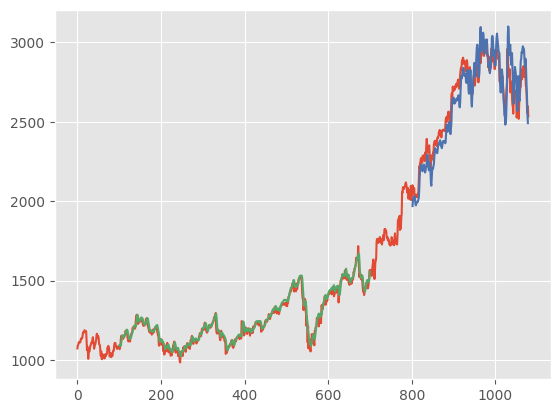

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, c = 'G')
plt.plot(testPredictPlot, c = 'B')
plt.show()

The green part represents the train predict data

the blue part repesents the test predict data

In [ ]:
len(test_data)

378

In [ ]:
#getting an input of length 100 for prediction
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
#convert into a list and taking all the values
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.76510394]
101
1 day input [0.95967888 0.96303856 0.92390532 0.95717911 0.92106751 0.91265842
 0.93168831 0.92210129 0.93356696 0.97446443 0.98357933 0.9781323
 0.98174048 0.96012127 0.94104164 0.96622934 0.94638929 0.91935291
 0.91817995 0.93672279 0.96597089 0.97095575 0.98079612 0.96867451
 0.96835648 0.96383877 0.95043488 0.95182151 0.94593707 0.88009045
 0.87981707 0.87255607 0.8889816  0.8995825  0.91642567 0.88816161
 0.89704294 0.86242729 0.85366536 0.83568406 0.80630188 0.81079969
 0.7723423  0.79518409 0.79291789 0.8361165  0.85552411 0.87878826
 0.98172555 0.93292084 0.93493867 0.8942647  0.89623277 0.91803095
 0.88848958 0.84537542 0.8577357  0.86849556 0.87972268 0.82804533
 0.8068138  0.80095423 0.77883306 0.82955621 0.8471348  0.85307384
 0.84317875 0.84824806 0.8415685  0.8217583  0.76681082 0.77402717
 0.83680229 0.82695695 0.80152075 0.76256151 0.79483622 0.83541578
 0.84096716 0.86369465 0.8634561  0.90089463 0.88506535 0.91783208
 0.91883601 0.91667417 0.92711102 

In [ ]:
#we took 100 days from the previous day in the test data
#we take the next 30 days that we want to predict
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [ ]:
len(df1)

1080

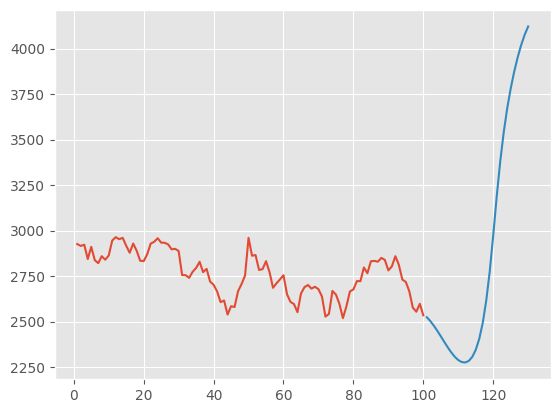

In [ ]:
#Taking the previous 100 data from our dataframe
#predicted data is obtaine from the pre calculated list(lst_output)
plt.plot(day_new,scaler.inverse_transform(df1[980:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

Blue part represent the next predicted 30 days

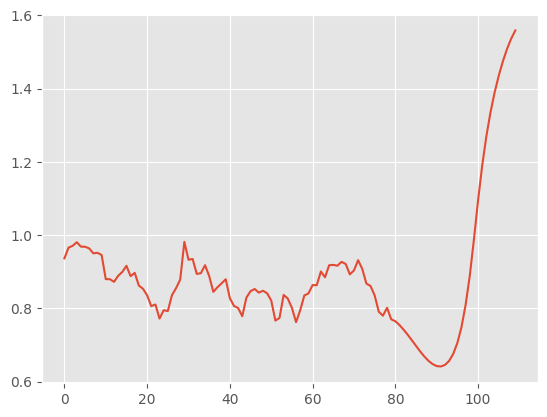

In [ ]:
#Combining the predicteed curve for complete output
#Combine df1 and the list output inside df3
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])
plt.show()

In [ ]:
#Transforming back df3
df3=scaler.inverse_transform(df3).tolist()

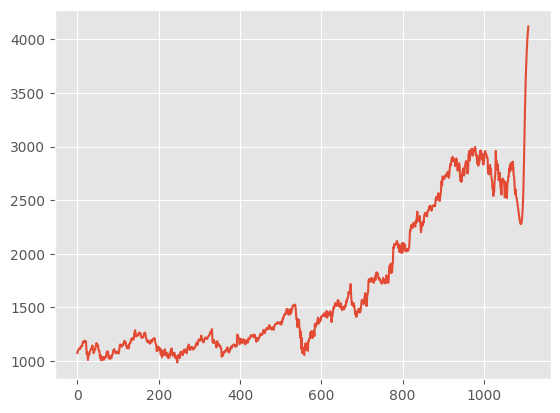

In [ ]:
#plotting the curve with the next 30 days predicted
plt.plot(df3)
plt.show()

Our model predicts a decrease in the closing price for google stock market in the coming 30 days

## Challenging the Solution

### Lstm 2

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1026

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(dataset).reshape(-1,1))

scaled_data


array([[0.04400377],
       [0.05310374],
       [0.05521099],
       ...,
       [0.78009047],
       [0.80175432],
       [0.7703047 ]])

In [ ]:
import numpy

#creating timestep

def create_dataset(dataset, timestep=1):
  dataX, dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step=60
x_train, y_train=create_dataset(train_data, time_step)
x_test, y_test=create_dataset(test_data, time_step)



In [ ]:
print("Train dataset","\n",x_train.shape),print(y_train.shape)
print("******")

Train dataset 
 (641, 60)
(641,)
******


In [ ]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(25, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(25, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_2 = model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
21/21 [==============================] - 4s 24ms/step - loss: 0.0085
Epoch 2/100
21/21 [==============================] - 0s 24ms/step - loss: 0.0018
Epoch 3/100
21/21 [==============================] - 1s 24ms/step - loss: 7.8635e-04
Epoch 4/100
21/21 [==============================] - 1s 24ms/step - loss: 7.1960e-04
Epoch 5/100
21/21 [==============================] - 1s 24ms/step - loss: 6.6286e-04
Epoch 6/100
21/21 [==============================] - 0s 23ms/step - loss: 6.1643e-04
Epoch 7/100
21/21 [==============================] - 0s 23ms/step - loss: 5.9235e-04
Epoch 8/100
21/21 [==============================] - 1s 24ms/step - loss: 5.4330e-04
Epoch 9/100
21/21 [==============================] - 1s 24ms/step - loss: 5.1895e-04
Epoch 10/100
21/21 [==============================] - 0s 23ms/step - loss: 5.1536e-04
Epoch 11/100
21/21 [==============================] - 0s 24ms/step - loss: 4.7323e-04
Epoch 12/100
21/21 [==============================] - 1s 24ms/step - lo

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 60, 25)            2700      
                                                                 
 lstm_25 (LSTM)              (None, 25)                5100      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 7,826
Trainable params: 7,826
Non-trainable params: 0
_________________________________________________________________


## Predicting and testing our model

In [ ]:
train_predict=model.predict(x_train)



In [ ]:
test_predict=model.predict(x_test)


In [ ]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_predict))

0.013337721211447473

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.08958350567203546

Both our rmses are close to each other and close to 0 so our model is doing good

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,test_predict)


0.6940243033478586

Our accuracy score is 69% which is good

#### Checking for overfitting


In [ ]:
overfit=np.subtract(test_predict,y_test)

pd.DataFrame(overfit).describe()

overfit.mean()

-0.08258045957983462

Our model doesn't overfit

---



---



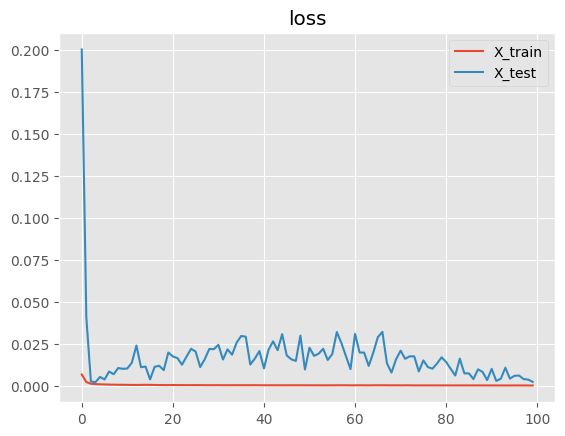

In [ ]:
##plotting for loss during training
from matplotlib import pyplot
plt.subplot()
plt.title("loss")
plt.plot(history_1.history["loss"],label="X_train")
plt.plot(history_1.history["val_loss"], label="X_test")
plt.legend();

# Forecasting Timeseries Data Using Facebook FbProphet

In [ ]:
df = data['Close']

In [ ]:
df.head()

Date
2018-01-02    1073.209961
2018-01-03    1091.520020
2018-01-04    1095.760010
2018-01-05    1110.290039
2018-01-08    1114.209961
Name: Close, dtype: float64

Fbprophet requires us to change the variable names to 'ds' and 'y'

In [ ]:
df = df.to_frame().reset_index()

In [ ]:
df.head()

,Date,Close
0,2018-01-02,1073.209961
1,2018-01-03,1091.520020
2,2018-01-04,1095.760010
3,2018-01-05,1110.290039
4,2018-01-08,1114.209961


In [ ]:
df.columns=["ds","y"]
df.head()
# ds represents the Date column, and y is the target variable which in our case is the close variable

,ds,y
0,2018-01-02,1073.209961
1,2018-01-03,1091.520020
2,2018-01-04,1095.760010
3,2018-01-05,1110.290039
4,2018-01-08,1114.209961


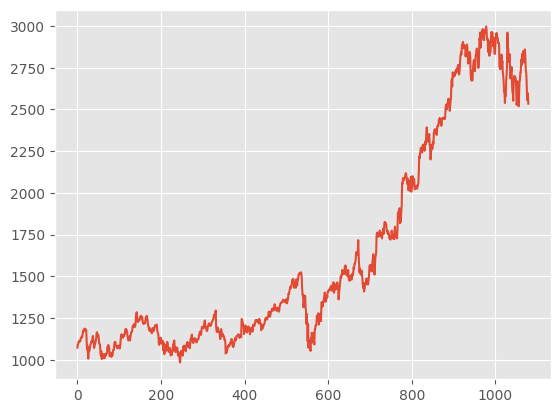

In [ ]:
df['y'].plot()
plt.show()

In [ ]:
### intiialize the Model
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#takes yearly seasonality
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
df.tail()

,ds,y
1075,2022-04-08,2665.750000
1076,2022-04-11,2576.469971
1077,2022-04-12,2554.290039
1078,2022-04-13,2597.879883
1079,2022-04-14,2534.600098


In [ ]:
future_dates.tail()

,ds
1440,2023-04-10
1441,2023-04-11
1442,2023-04-12
1443,2023-04-13
1444,2023-04-14


In [ ]:
### Prediction
prediction=model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,1164.239551,1100.578381,1248.627687,1164.239551,1164.239551,10.234961,10.234961,10.234961,18.365628,18.365628,18.365628,-8.130667,-8.130667,-8.130667,0.0,0.0,0.0,1174.474512
1,2018-01-03,1164.342386,1093.561826,1259.930167,1164.342386,1164.342386,10.249749,10.249749,10.249749,23.011648,23.011648,23.011648,-12.761899,-12.761899,-12.761899,0.0,0.0,0.0,1174.592135
2,2018-01-04,1164.445221,1090.868512,1257.481167,1164.445221,1164.445221,5.471534,5.471534,5.471534,22.785143,22.785143,22.785143,-17.313609,-17.313609,-17.313609,0.0,0.0,0.0,1169.916755
3,2018-01-05,1164.548056,1083.768445,1240.508134,1164.548056,1164.548056,0.451575,0.451575,0.451575,22.197094,22.197094,22.197094,-21.745519,-21.745519,-21.745519,0.0,0.0,0.0,1164.999631
4,2018-01-08,1164.856562,1068.745531,1229.497579,1164.856562,1164.856562,-15.509012,-15.509012,-15.509012,18.419003,18.419003,18.419003,-33.928014,-33.928014,-33.928014,0.0,0.0,0.0,1149.347550


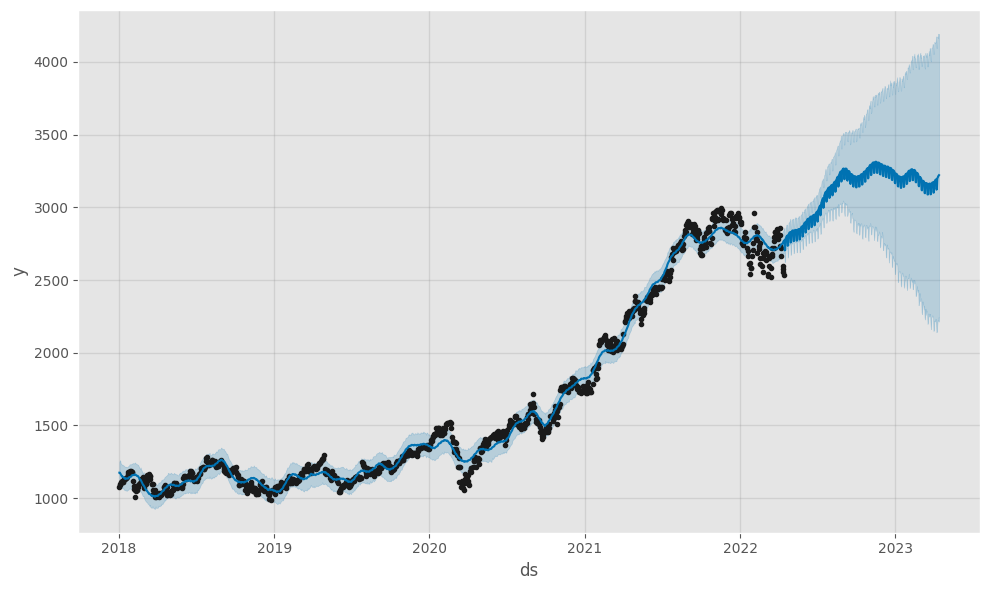

In [ ]:
#### plot the predicted projection
model.plot(prediction);

dotted points is the real data

blue line is the projection

light blue space is the trend

The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

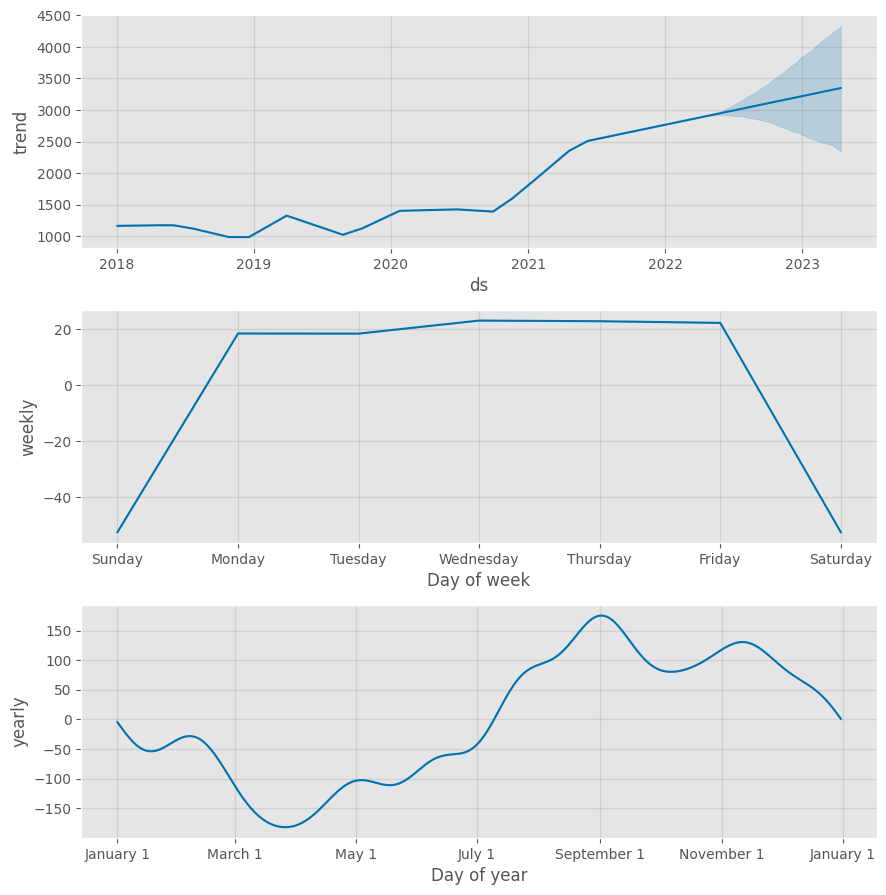

In [ ]:
##### Visualize Each Components[Trends,Weekly,yearly]
model.plot_components(prediction);

## Cross Validation
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [ ]:
train_data.shape

(702, 1)

In [ ]:
#cross validation
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-04-14 00:00:00 and 2021-04-14 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#yhat is the predicted value
#y is the actual value
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-04-15,2212.666248,2149.298359,2281.309355,2285.250000,2021-04-14
1,2021-04-16,2217.726258,2152.472846,2277.878358,2282.750000,2021-04-14
2,2021-04-19,2232.703728,2168.120672,2295.251689,2289.760010,2021-04-14
3,2021-04-20,2239.687356,2171.950405,2303.180207,2279.010010,2021-04-14
4,2021-04-21,2247.546832,2174.902768,2315.101456,2278.350098,2021-04-14


##### Obtaining the Performance Metrics
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [ ]:
#obtaining the metrics
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,35 days,3919.650817,62.607115,54.027527,0.023575,0.023330,0.64
1,36 days,3813.319957,61.752085,53.167754,0.023190,0.022146,0.68
2,37 days,3819.836223,61.804824,53.217387,0.023206,0.022146,0.72
3,40 days,3692.255583,60.763933,51.259859,0.022347,0.020905,0.72
4,41 days,3635.993596,60.299201,50.159768,0.021857,0.020905,0.72


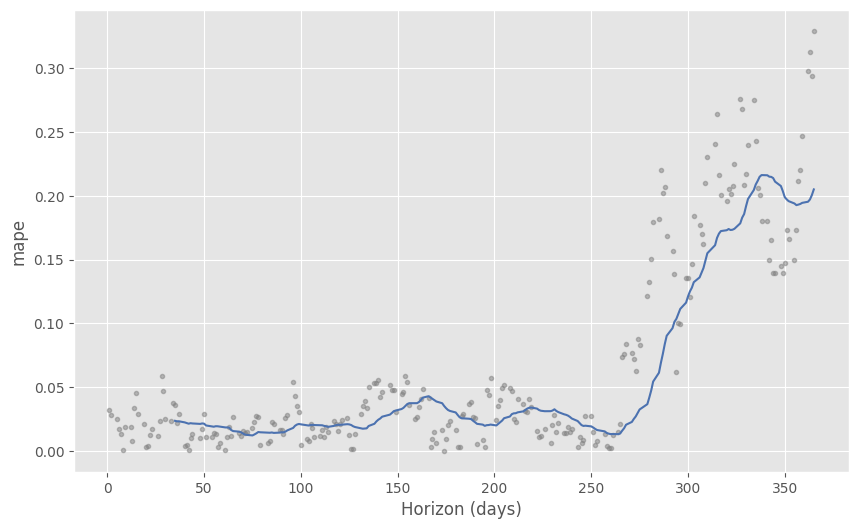

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mape')

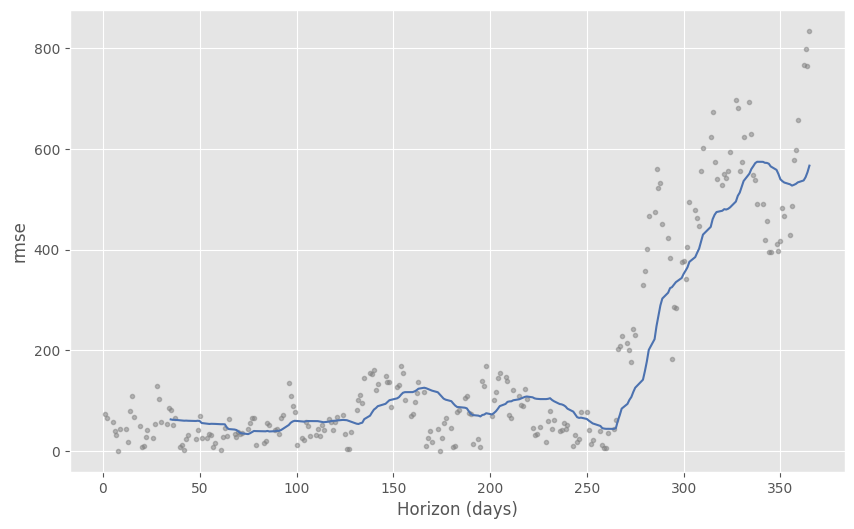

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

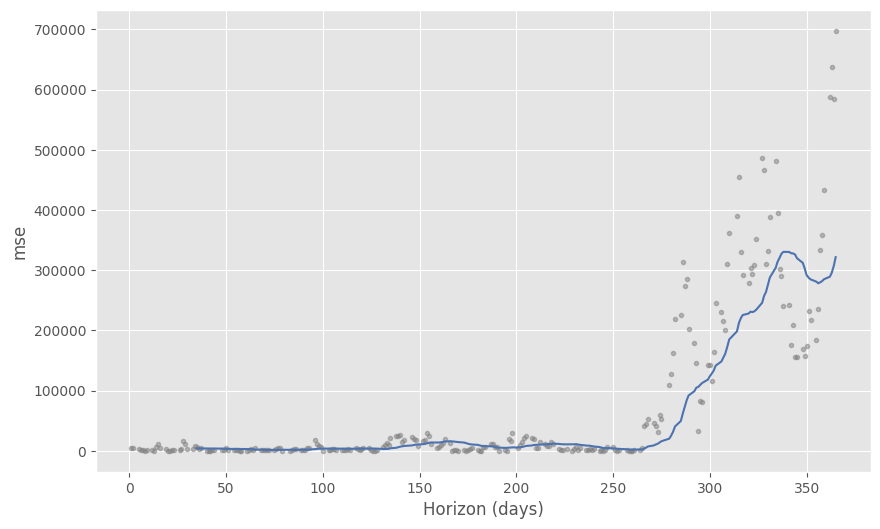

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse')

## Prediction for 41days which had the lowest rmse(60.29)

In [ ]:
#### Create future dates of 365 days
f_dates=model.make_future_dataframe(periods=41)

In [ ]:
#a month a head
f_dates.tail()

,ds
1116,2022-05-21
1117,2022-05-22
1118,2022-05-23
1119,2022-05-24
1120,2022-05-25


In [ ]:
### Prediction
pred=model.predict(f_dates)

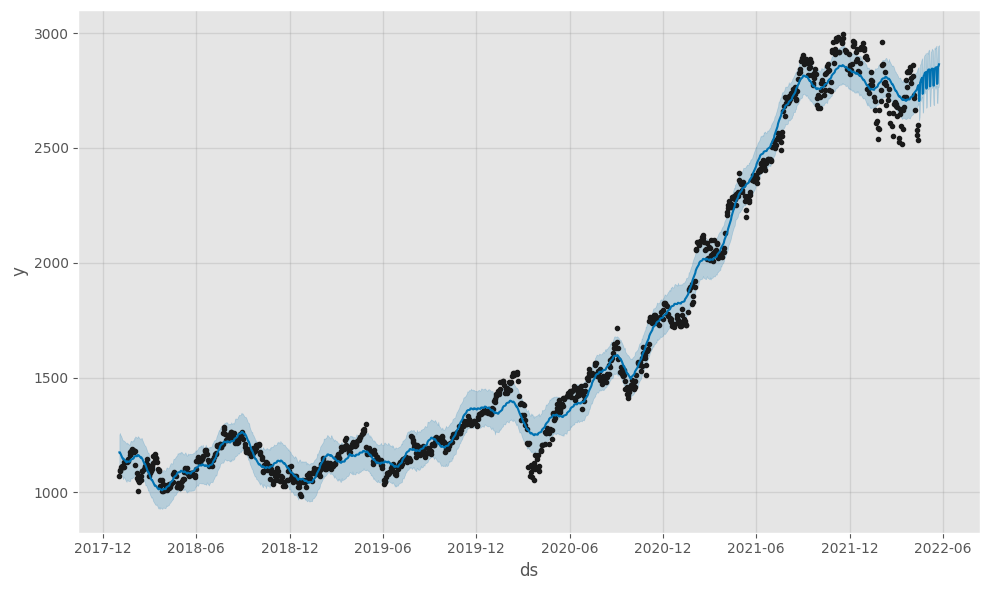

In [ ]:
#### plot the predicted projection
model.plot(pred);

Our model predicts an increase in the google stock market price in the next 36 days

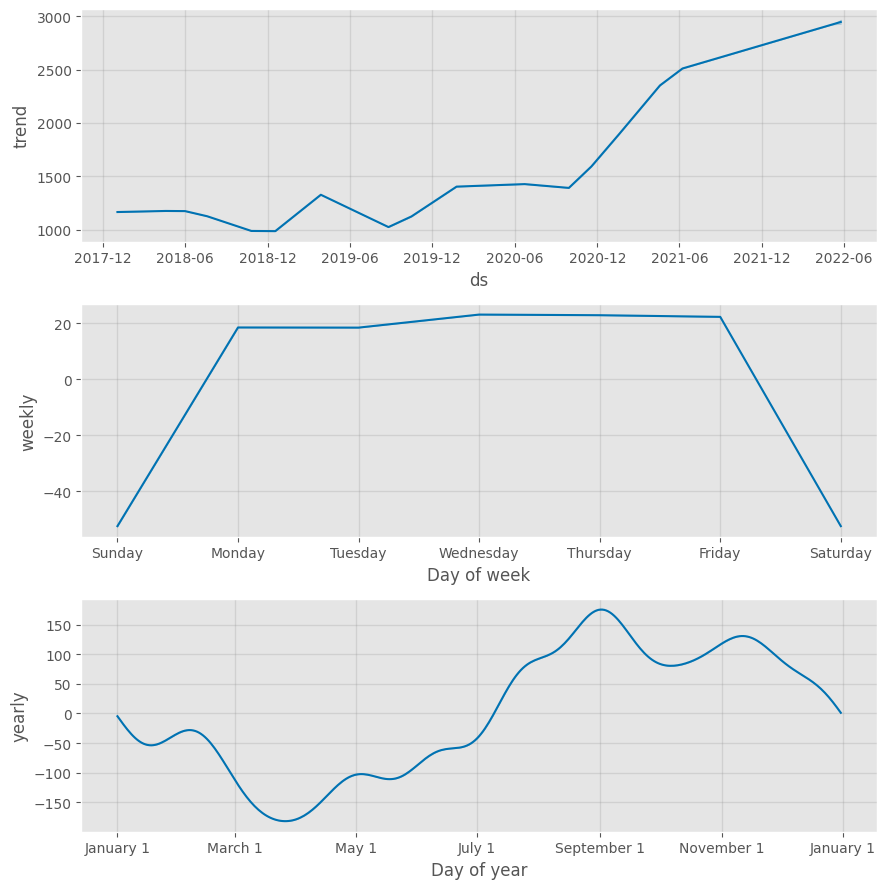

In [ ]:
##### Visualize Each Components[Trends,Weekly,yearly]
model.plot_components(pred);

#  Conclusions

1. LSTM 

a. The first LSTM model for the google stock prediction gave us a low MSE of 0.048 and a score of 85% which is really good since the model doesn't overfit/underfit

Visualization: the plots shows predicts a drop in stock price followed by a drastic increase in stock price

b. The 2nd Model has an MSE of 0.089 and an accuracy of 69%, its performance is lower than the first, the model doesn't overfit/underfit

From the scores obtained by the two models our first model performed better than the second

2. FBPROPHET

Visualization: our plot predicts an increase in stock prices with a small deeps/drops but generally the stock price increases

# Recommendations

1.   LSTM

Strengths

*  Good predictor of sequential data such as stock 
*  Based on a set of last values,therefore less prone to variance due to seasonality and already consider the current trend

Weakness

*   takes longer to train and require more memory to train.
*   Easy to overfitting


2.   FBPROPHET

Strengths

*  It is simple and easy to go package for performing time series analytics
*  Do not rely on specific assumptions about the data such as time series stationarity
*  Requires less hyperparameter tuning as it is specifically designed to detect patterns in business time series
*  Is able to handle time series data with seasonality and trends 
*  

The above are the observations made when working with both models 

From the above FBprophet presents itself as a better model when specifically working with time series data thus a highly recommended model